<h1><center>Machine Learning Project - AVAZU<center></h1>


# File Imports and Instructions

In [6]:
import sys
from zipfile import ZipFile
import os.path as op
try:
    from urllib.request import urlretrieve
except ImportError:  # Python 2 compat
    from urllib import urlretrieve
    
AVAZU_URL = "https://bianchi.wp.imt.fr/files/2019/05/train-1000000.zip"
AVAZU_FILENAME = AVAZU_URL.rsplit('/', 1)[1]


if not op.exists(AVAZU_FILENAME):
    print('Downloading %s to %s...' % (AVAZU_URL, AVAZU_FILENAME))
    urlretrieve(AVAZU_URL, AVAZU_FILENAME)
    ZipFile(AVAZU_FILENAME).extractall('.')

In [7]:
ZipFile(AVAZU_FILENAME).extractall('.')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

Data description here: https://www.kaggle.com/c/avazu-ctr-prediction/data  


In [4]:
df = pd.read_csv('train-1000000')

## Work assignment

1.   Perform Exploratory Data Analysis (EDA)
2.   Predict the probability that an add is clicked, based on the features. 
3.   Evaluate the performance of your method.

## Work evaluation

Your work will be evaluated based on:

*   The interest of the EDA (4 points)
*   The quality of the comments/remarks throughout the notebook (4 points)
*   The feature engineering (5 points)
*   The efforts made in trying several predictors and tuning them (5 points)
*   The relevance of the performance criteria used to conclude (2 points)
*   BONUS (+1pt) : Register to the AVAZU challenge in Kaggle. What is your rank?

You may find the following script useful to convert the raw time stamp into a more useable feature. For instance, you may generate new pandas series using the code:

```
df['hour'].apply(lambda x:datesplit(x).weekday())
df['hour'].apply(lambda x:datesplit(x).hour)
```



In [5]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

# EDA

## Generic

In [6]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23


The dataset consists of 24 columns out of which we have 22 features and the 2 other columns are ad-id and clicked or not information. There are user-based features such as Device ID, Device IP, Device Model, Connection type, and Device type. There are context-based features such as Site id, App id, Site Category, App Category, Site domain, etc. Then, there are anonymized categorical variables such as C1, C14, C21.

In [12]:
df.shape

(1000000, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  float64
 1   click             1000000 non-null  int64  
 2   hour              1000000 non-null  int64  
 3   C1                1000000 non-null  int64  
 4   banner_pos        1000000 non-null  int64  
 5   site_id           1000000 non-null  object 
 6   site_domain       1000000 non-null  object 
 7   site_category     1000000 non-null  object 
 8   app_id            1000000 non-null  object 
 9   app_domain        1000000 non-null  object 
 10  app_category      1000000 non-null  object 
 11  device_id         1000000 non-null  object 
 12  device_ip         1000000 non-null  object 
 13  device_model      1000000 non-null  object 
 14  device_type       1000000 non-null  int64  
 15  device_conn_type  1000000 non-null  int64  
 16  C

In [14]:
pd.isnull(df).sum(axis=0)

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

There is no missing data.

In [15]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

Changing the format of 'hour' column since it's not really usable as it is.

In [7]:
df['day'] = df['hour'].apply(lambda x:datesplit(x).weekday())
df['hour'] = df['hour'].apply(lambda x:datesplit(x).hour)

In [17]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,2,4687,320,50,423,2,39,100148,32,2
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,17894,320,50,2039,2,39,100077,32,3
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,0,22684,320,50,2619,1,163,100055,71,0
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,0,23222,320,50,2676,0,35,100176,221,2
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,0,8330,320,50,761,3,175,100081,23,2


In [17]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+06,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.226511e+18,0.169971,2014-10-25 22:30:02.692800768,1004.968549,0.288466,1.015506,0.332436,18835.759473,318.888112,60.030918,2111.794488,1.432802,226.940103,53163.356361,83.404070
min,1.003272e+13,0.000000,2014-10-21 00:00:00,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.613978e+18,0.000000,2014-10-23 04:00:00,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.238351e+18,0.000000,2014-10-26 02:00:00,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.384023e+19,0.000000,2014-10-28 14:00:00,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100088.000000,101.000000
max,1.844670e+19,1.000000,2014-10-30 23:00:00,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000
std,5.322835e+18,0.375608,NaN,1.096112,0.505974,0.527867,0.856103,4966.228494,21.279475,47.174174,610.393836,1.325815,350.944666,49960.216178,70.326773


In [31]:
df['click'].value_counts()/df.shape[0]

click
0    0.830029
1    0.169971
Name: count, dtype: float64

The CTR of the dataset is 16.99%.

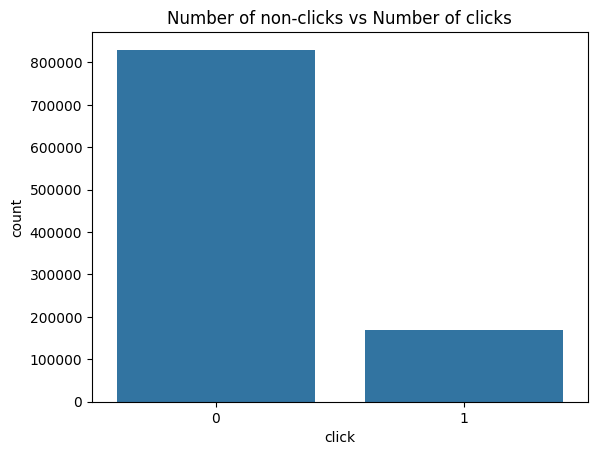

In [37]:
sns.countplot(x='click',data=df)
plt.title("Number of non-clicks vs Number of clicks")
plt.show()

There is a clear imbalance of data in terms of click vs not click. But this atleast makes sense in real life.

Let's see if there is unique data and imbalances in our features.

In [34]:
df.nunique()

id                  1000000
click                     2
hour                     24
C1                        7
banner_pos                7
site_id                2651
site_domain            2871
site_category            22
app_id                 3157
app_domain              198
app_category             26
device_id            150501
device_ip            555248
device_model           5168
device_type               5
device_conn_type          4
C14                    2243
C15                       8
C16                       9
C17                     420
C18                       4
C19                      66
C20                     163
C21                      60
day                       7
dtype: int64

Here some features like device-id, device-ip have many unique values, so if we featurize them with normal techiques such as one hot encoding then the group of features will become very big, so we can probably engineer new features based on them or use some other form of encoding.

## Context Based Features EDA

##### banner_pos

Now, I'm going to verify the impact of banner_pos on the CTR since that seems the best way to start with logically.

click            0       1
banner_pos                
0           601209  118235
1           227481   51324
2              291      35
3               38       6
4              155      21
5              117      14
7              738     336


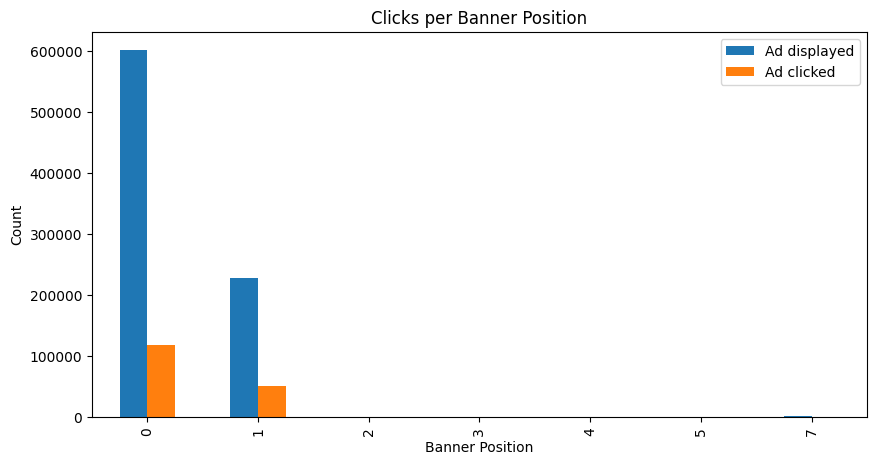

In [61]:
df_bannerclicks=df.groupby(['banner_pos','click']).size().unstack()
print(df_bannerclicks)
df_bannerclicks.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Banner Position')
plt.title('Clicks per Banner Position')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

Here we can clearly observe that most of the ads are under the position 0 and 1 and the positions 2 to 7 also have ads but they are significantly less in comparison.

I think it's also important to visualize the CTR per banner_pos since they might have imbalanced data but their CTR may differ.

In [53]:
df_bannerclicks['CTR'] = df_bannerclicks[1]/(df_bannerclicks[0]+df_bannerclicks[1])
df_bannerclicks

click,0,1,CTR
banner_pos,,,
0,601209,118235,0.164342
1,227481,51324,0.184086
2,291,35,0.107362
3,38,6,0.136364
4,155,21,0.119318
5,117,14,0.106870
7,738,336,0.312849


Visualizing this in the form of a graph.

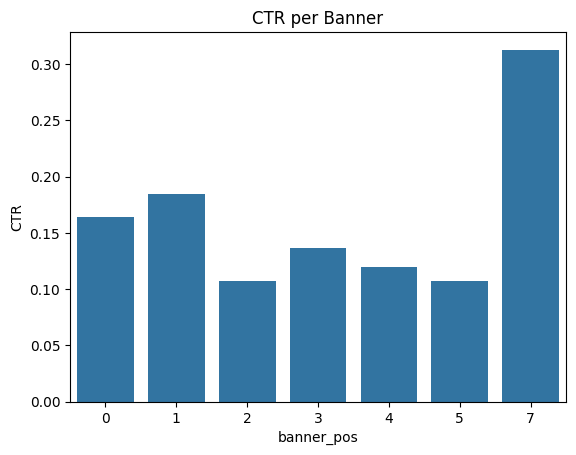

In [57]:
sns.barplot(y=df_bannerclicks['CTR'].values,x=df_bannerclicks.index)
plt.ylabel('CTR')
plt.title('CTR per Banner')
plt.show()

Even though position 7 does not have the most datapoints, it has the highest CTR when compared to the position 0 and 1. This suggests that companies may benefit from designing the user interface in a way that directs users towards position 7, increasing the chances of users clicking the ad placed in that position.

##### site_id

Next, I would like to explore site ID and it's impact

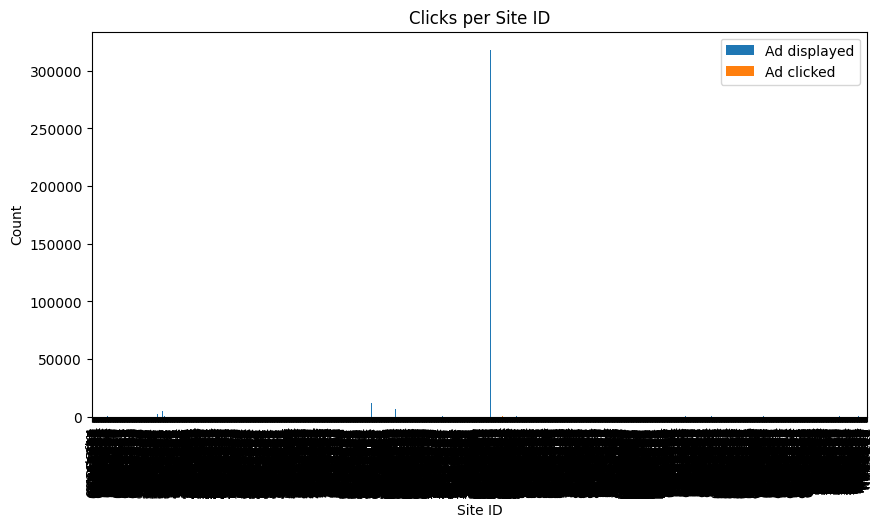

In [74]:
df_siteclicks=df.groupby(['site_id','click']).size().unstack()
df_siteclicks.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Site ID')
plt.title('Clicks per Site ID')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

I cut down the data when visualizing since there are so few site ids to make sense of, and too many site ids with few datapoints, making it hard to visualize the data.

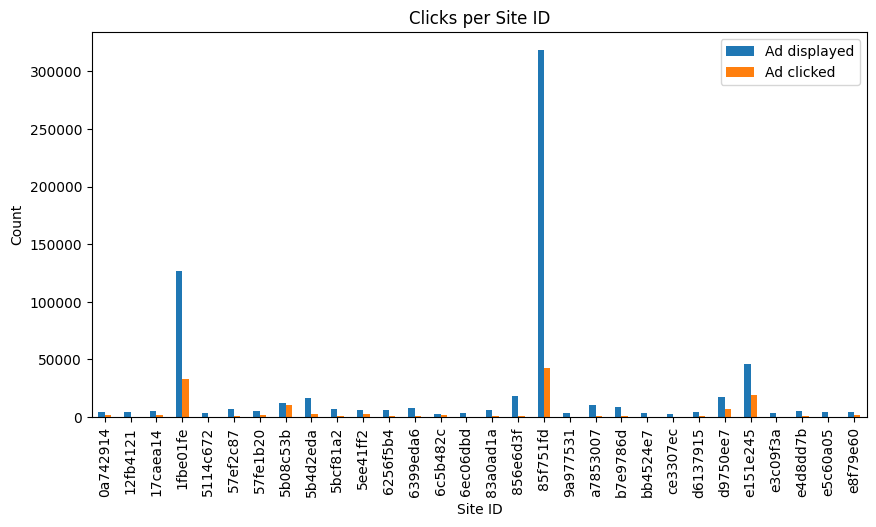

In [75]:
df_siteclicks_b = df_siteclicks[df_siteclicks[0]>2500]
df_siteclicks_b.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Site ID')
plt.title('Clicks per Site ID')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

Clearly, there are only a few sites where the number of clicks/views are the highest. This suggests that there is a high chance of clicking an ad placed in those sites.

Let's see the CTR for each site ID since that may reveal new insights such as in the case of banner_pos

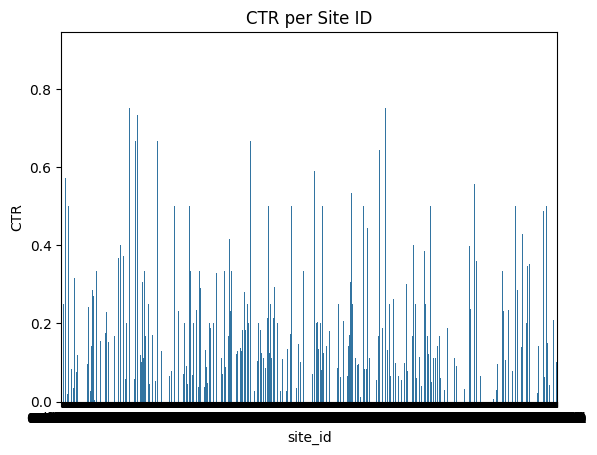

In [78]:
df_siteclicks['CTR']= df_siteclicks[1]/(df_siteclicks[0]+df_siteclicks[1])
sns.barplot(y=df_siteclicks['CTR'].values,x=df_siteclicks.index)
plt.ylabel('CTR')
plt.title('CTR per Site ID')
plt.show()

In [88]:
average = df_siteclicks['CTR'].mean()
print('The average CTR for Site-ids is : ', average)
print('Count of sites with above average CTR: ', (df_siteclicks['CTR']>average).sum())

The average CTR for Site-ids is :  0.22122802124640342
Count of sites with above average CTR:  569


It's interesting to observe that 569/2651 sites have above average CTR and a few of them have a very high CTR (as much as 0.8) which is way greater than the global average. I think this feature might be pretty useful in predicting.

##### app_id

Let's now analyse app id similarly.

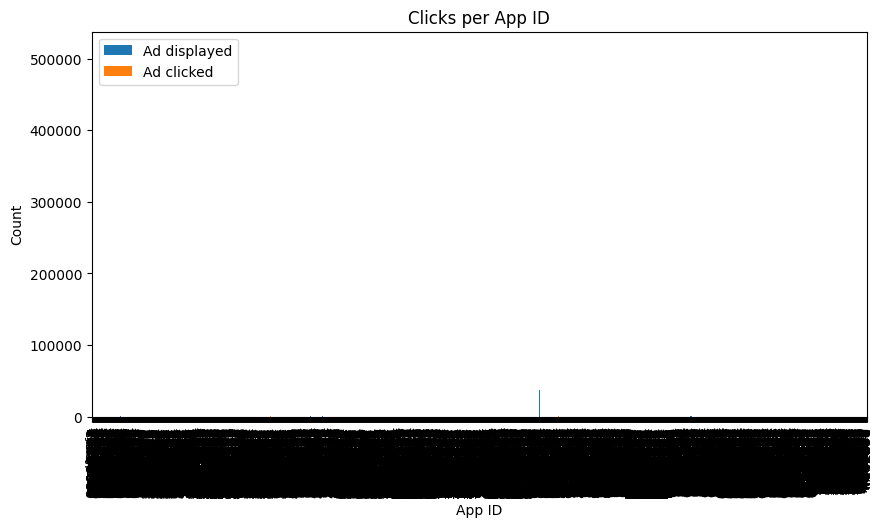

In [91]:
df_appclick=df.groupby(['app_id','click']).size().unstack()
df_appclick.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('App ID')
plt.title('Clicks per App ID')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

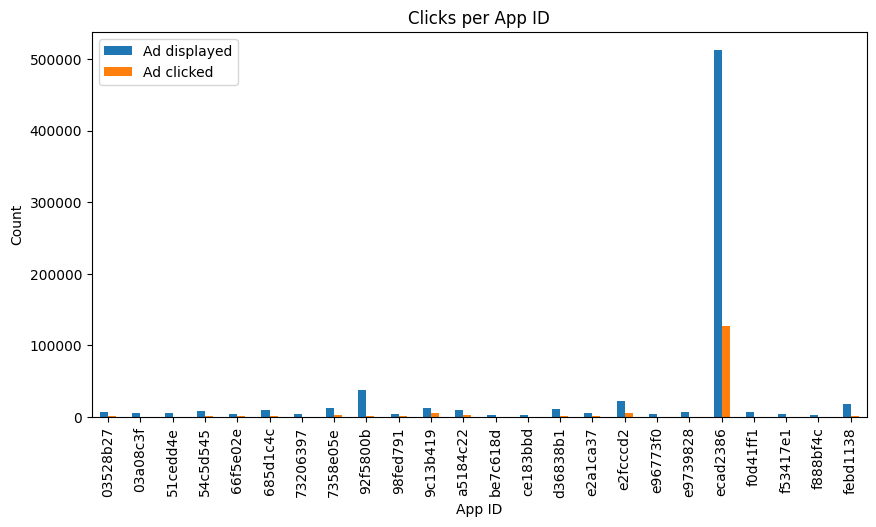

In [94]:
df_appclick_b = df_appclick[df_appclick[0]>2500]
df_appclick_b.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('App ID')
plt.title('Clicks per App ID')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

Clearly, there are only a few apps where the number of clicks/views are high. This suggests that there is a high chance of clicking an ad placed in those apps. In particular, there is one app where the number of views is very large which means that it is visited by a majority of the users.

Let's see the CTR for each app ID since that may reveal new insights such as in the case of banner_pos

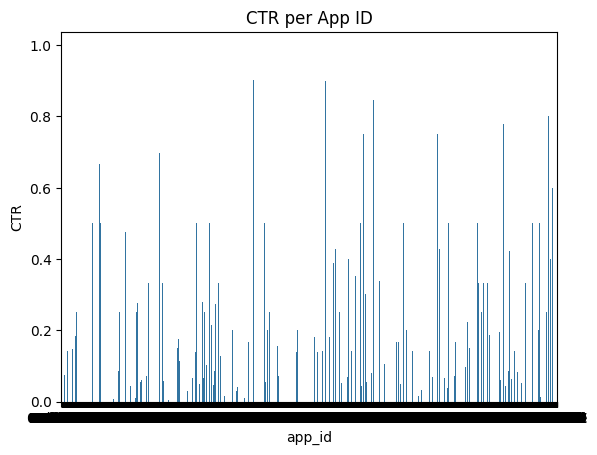

In [95]:
df_appclick['CTR']= df_appclick[1]/(df_appclick[0]+df_appclick[1])
sns.barplot(y=df_appclick['CTR'].values,x=df_appclick.index)
plt.ylabel('CTR')
plt.title('CTR per App ID')
plt.show()

In [96]:
average = df_appclick['CTR'].mean()
print('The average CTR for App-ids is : ', average)
print('Count of apps with above average CTR: ', (df_appclick['CTR']>average).sum())

The average CTR for App-ids is :  0.2353709210436621
Count of apps with above average CTR:  413


While the app id plot is similar to the site id plot in disparity of CTRs among different apps; in contrast, almost all the websites display ads as we can see the CTR bars are well distributed among the websites than the app ids plot.

It is interesting to note that the average CTR per app-id is more than the average CTR per site-id which suggests that even though the apps show less ads, there is a high chance that the user clicks an ad in an app rather than on a website. This suggests that both of these are useful features.

##### site_domain

Let's now analyse site domain similarly.

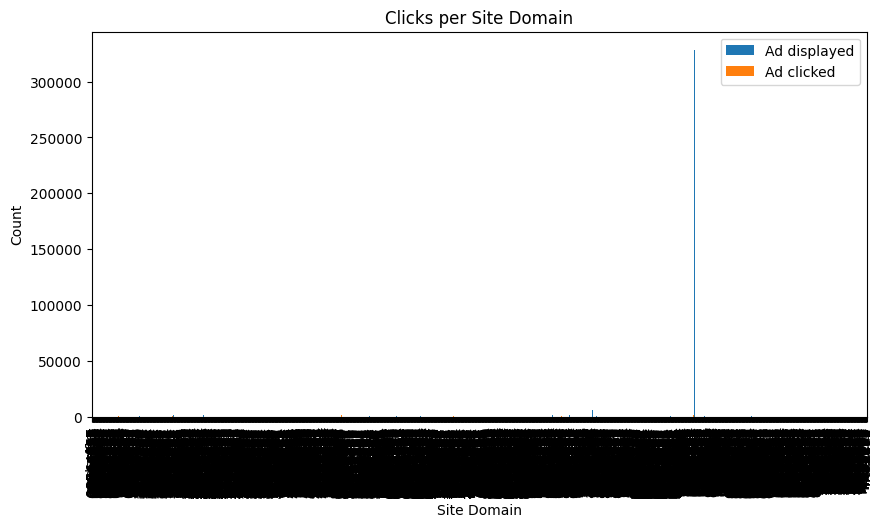

In [97]:
df_sitedomain=df.groupby(['site_domain','click']).size().unstack()
df_sitedomain.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Site Domain')
plt.title('Clicks per Site Domain')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

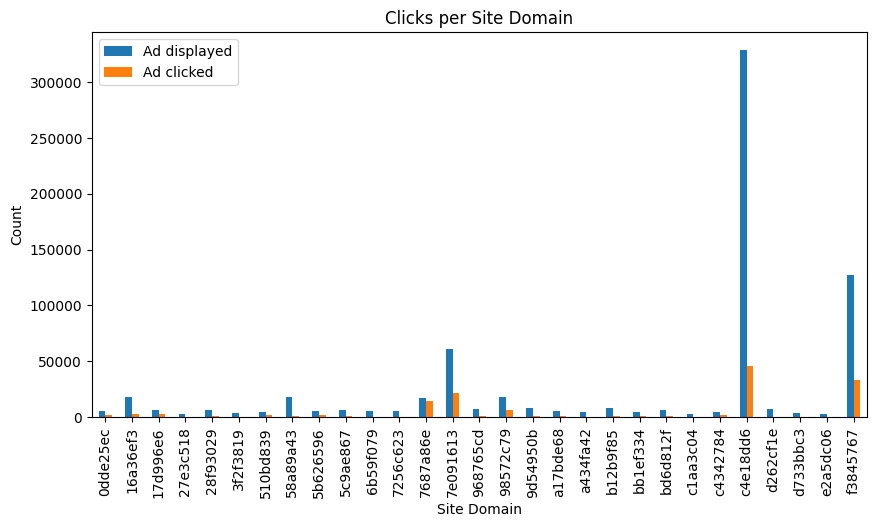

In [98]:
df_sitedomain_b = df_sitedomain[df_sitedomain[0]>2500]
df_sitedomain_b.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Site Domain')
plt.title('Clicks per Site Domain')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

Clearly, there are only a few site domains where the number of clicks/views are high. This suggests that there is a high chance of clicking an ad placed in those site domains. In particular, there is one site domain where the number of views is very large which means that it is visited by a majority of the users.

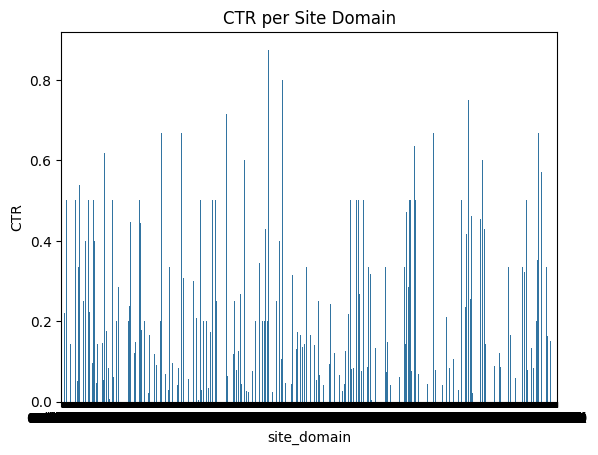

In [99]:
df_sitedomain['CTR']= df_sitedomain[1]/(df_sitedomain[0]+df_sitedomain[1])
sns.barplot(y=df_sitedomain['CTR'].values,x=df_sitedomain.index)
plt.ylabel('CTR')
plt.title('CTR per Site Domain')
plt.show()

In [100]:
average = df_sitedomain['CTR'].mean()
print('The average CTR for Site Domain is : ', average)
print('Count of Site Domains with above average CTR: ', (df_sitedomain['CTR']>average).sum())

The average CTR for Site Domain is :  0.2486345020528393
Count of Site Domains with above average CTR:  559


The site domain plot is very similar to the site id plot in disparity of CTRs among different apps. This is also a useful feature since its average is also higher than the site ids.

##### site_category

Let's now analyse site category similarly.

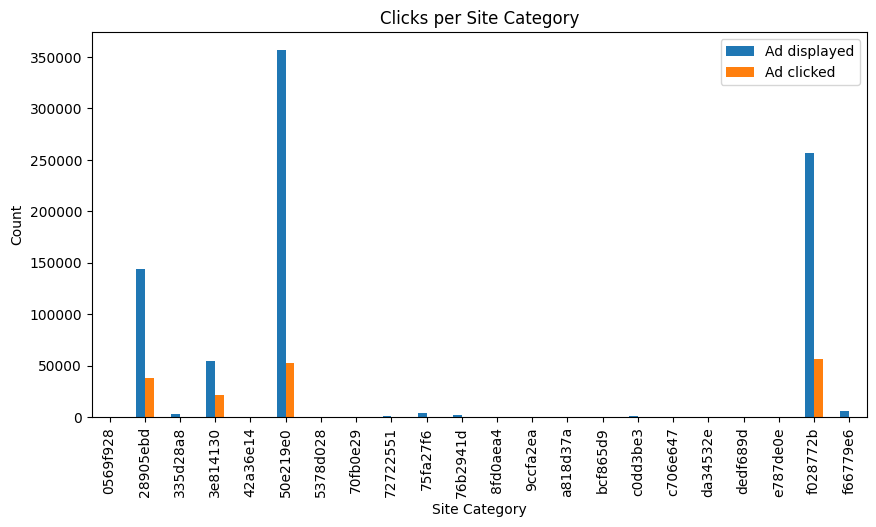

In [101]:
df_sitecategory=df.groupby(['site_category','click']).size().unstack()
df_sitecategory.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('Site Category')
plt.title('Clicks per Site Category')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

Clearly, there are only a few site categories where the number of clicks/views are high. This suggests that there is a high chance of clicking an ad placed in those site categories. 

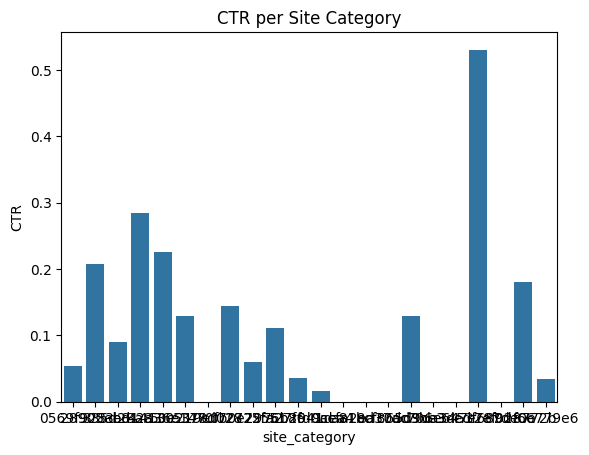

In [104]:
df_sitecategory['CTR']= df_sitecategory[1]/(df_sitecategory[0]+df_sitecategory[1])
sns.barplot(y=df_sitecategory['CTR'].values,x=df_sitecategory.index)
plt.ylabel('CTR')
plt.title('CTR per Site Category')
plt.show()

In [106]:
average = df_sitecategory['CTR'].mean()
print('The average CTR for Site Category is : ', average)
print('Count of Site category with above average CTR: ', (df_sitecategory['CTR']>average).sum())

The average CTR for Site Category is :  0.14869275222024306
Count of Site category with above average CTR:  5


This is a very interesting feature. The CTR for some categories is very large despite having very low views and the CTR for a few of the site categories is very low despite having a very high view count. A few site categories have a very high CTR and a few of them have very low CTR, even 0, which is a nice contrast.

##### app_category

Let's now analyse app category similarly.

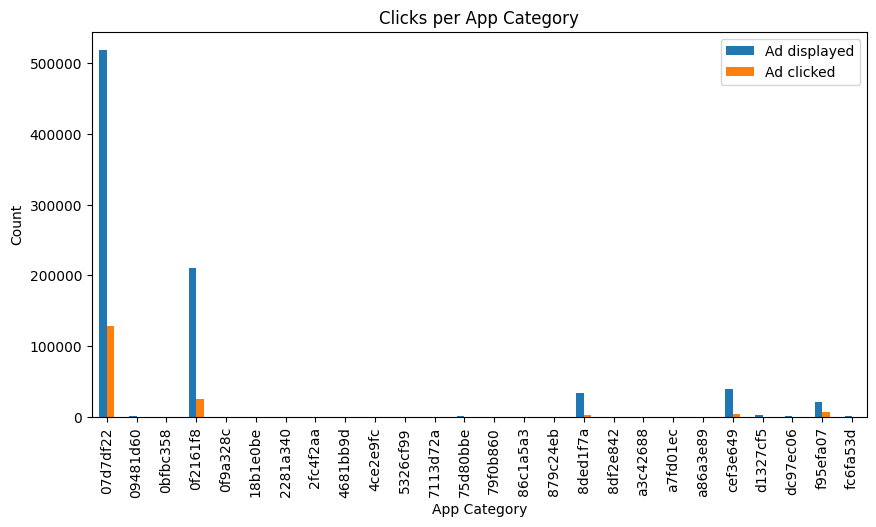

In [107]:
df_appcategory=df.groupby(['app_category','click']).size().unstack()
df_appcategory.plot(kind='bar',figsize=(10,5))
plt.ylabel('Count')
plt.xlabel('App Category')
plt.title('Clicks per App Category')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

Clearly, there are only a few app categories where the number of clicks/views are high. This suggests that there is a high chance of clicking an ad placed in those app categories. 

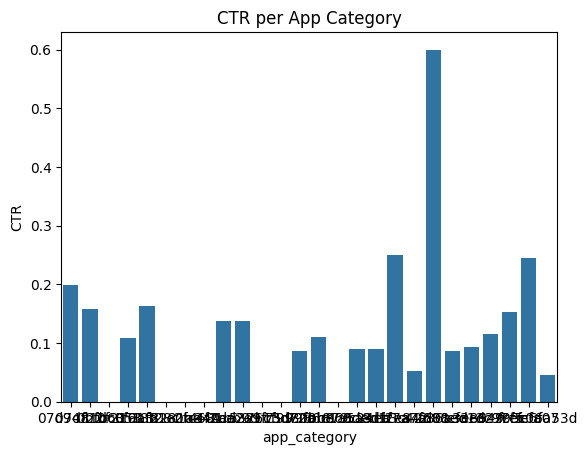

In [110]:
df_appcategory['CTR']= df_appcategory[1]/(df_appcategory[0]+df_appcategory[1])
sns.barplot(y=df_appcategory['CTR'].values,x=df_appcategory.index)
plt.ylabel('CTR')
plt.title('CTR per App Category')
plt.show()

In [111]:
average = df_appcategory['CTR'].mean()
print('The average CTR for App Category is : ', average)
print('Count of App Categories with above average CTR: ', (df_appcategory['CTR']>average).sum())

The average CTR for App Category is :  0.1537930280459163
Count of App Categories with above average CTR:  6


The trend and plots for app categories is very, very similar to that of site categories and the average CTRs are also almost the same for both. Again, this will also be a useful feature fo similar reasons.

## User Based Features EDA

##### device_id

Since there are too many unique device ids, I can't analyze them all, so I will take the top 10 device ids which have the highest number of views.

In [115]:
print('The top 10 devices that have the most views')
print((df['device_id'].value_counts())[0:10])

The top 10 devices that have the most views
device_id
a99f214a    824918
0f7c61dc       512
c357dbff       481
936e92fb       366
afeffc18       242
987552d1       103
d857ffbb        98
cef4c8cc        93
b09da1c4        91
28dc8687        86
Name: count, dtype: int64


Somehow we can observe that only 1 device has 82% of the ad views and then the following device id falls down to 0.05% which is comparatively pretty low.

In [140]:
top_10_devices_df = df[(df['device_id'].isin((df['device_id'].value_counts()/df.shape[0])[0:10].index))]

Plotting CTR for devices in top 10 device counts

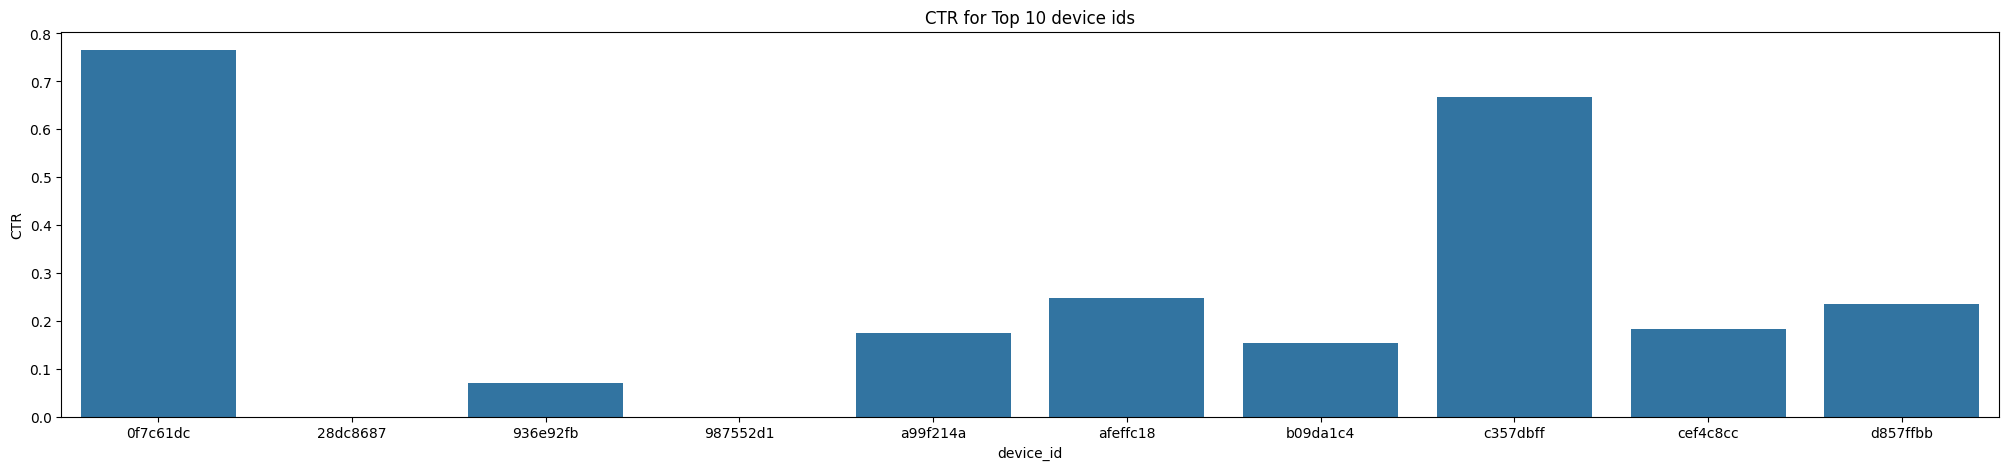

In [141]:
df_deviceid=top_10_devices_df.groupby(['device_id','click']).size().unstack()
df_deviceid['CTR']= df_deviceid[1]/(df_deviceid[0]+df_deviceid[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_deviceid['CTR'].values,x=df_deviceid.index)
plt.ylabel('CTR')
plt.title('CTR for Top 10 device ids')
plt.show()

The device id 'a99f214a' despite having huge number of views and clicks has a lower CTR than most in the top 10 device ids.
Some device ids, despite having very low view counts have very high CTRs, up to 0.75 and 0.6.

I believe that device id counts would be a great engineered feature to add to the model since it gives great insights into device ids' impact on views.

##### Engineered Feature I: device_id_counts

In [8]:
device_id_counts = df['device_id'].value_counts()

df['device_id_counts'] = df['device_id'].map(device_id_counts)

Let's analyse the new engineered feature.

A line plot is suitable here to see the range despite having missing values.

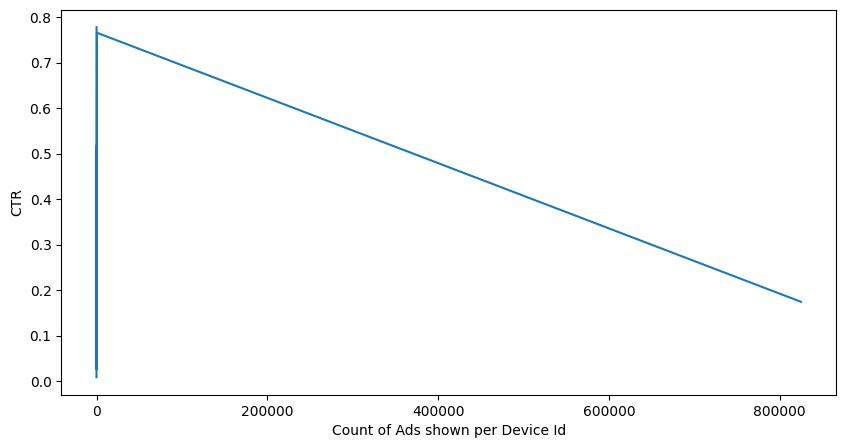

In [156]:
df_deviceid=df.groupby(['device_id_counts','click']).size().unstack()
df_deviceid['CTR']= df_deviceid[1]/(df_deviceid[0]+df_deviceid[1])
plt.figure(figsize=(10,5))
plt.plot(df_deviceid['CTR'])
plt.xlabel('Count of Ads shown per Device Id')
plt.ylabel('CTR')
plt.show()

Let's drop the null values to get a better sense of the plot

In [151]:
df_deviceid

click,0,1,CTR
device_id_counts,,,
1,114825.0,21672.0,0.158773
2,18158.0,2408.0,0.117086
3,5848.0,593.0,0.092066
4,2654.0,230.0,0.079750
5,1549.0,116.0,0.069670
6,884.0,34.0,0.037037
7,618.0,54.0,0.080357
8,514.0,38.0,0.068841
9,382.0,23.0,0.056790


In [152]:
df_deviceid.dropna(inplace=True)


In [153]:
df_deviceid

click,0,1,CTR
device_id_counts,,,
1,114825.0,21672.0,0.158773
2,18158.0,2408.0,0.117086
3,5848.0,593.0,0.092066
4,2654.0,230.0,0.079750
5,1549.0,116.0,0.069670
6,884.0,34.0,0.037037
7,618.0,54.0,0.080357
8,514.0,38.0,0.068841
9,382.0,23.0,0.056790


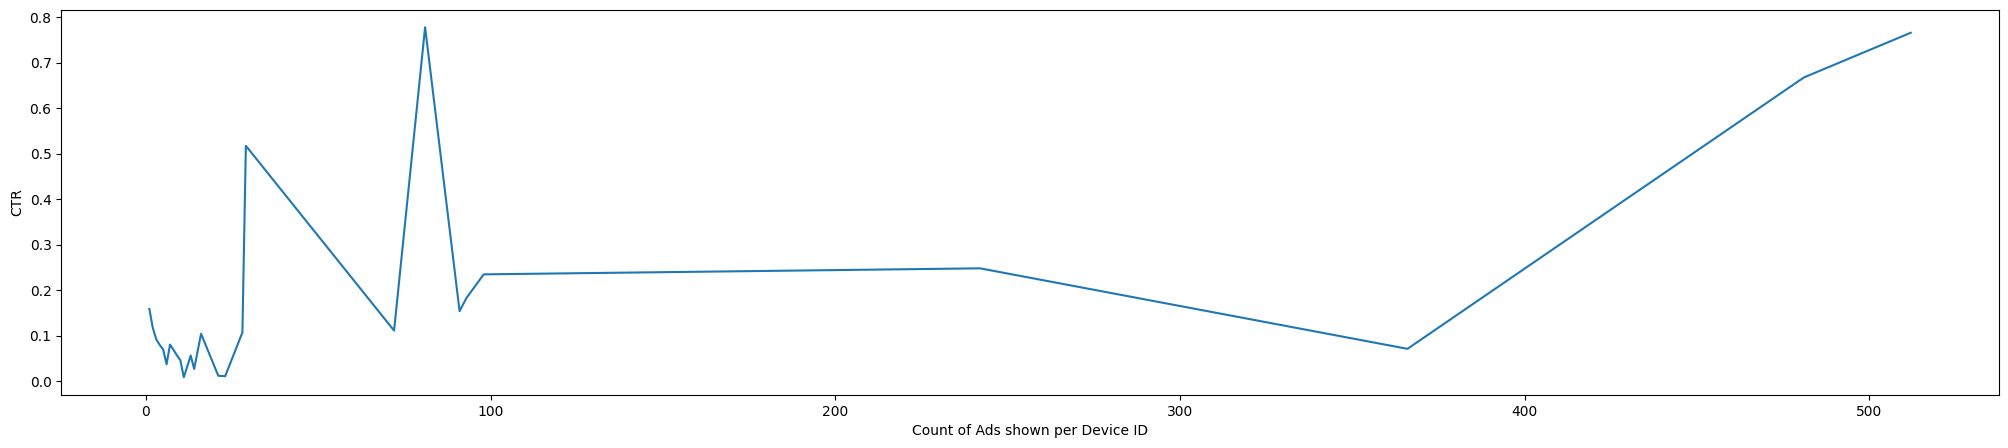

In [157]:
plt.figure(figsize=(25,5))
sns.lineplot(y=df_deviceid['CTR'].values[:-1],x=df_deviceid.index[:-1])
plt.xlabel('Count of Ads shown per Device ID')
plt.ylabel('CTR')
plt.show()

From the graph, we can observe that there are very few devices which are displayed many ads; here, there are 2 devices with high CTR values which are shown close to 30 and 100 ads and 1 device which is shown more than 2500 ads has a high CTR of close to 0.8.

From this analysis, we can see that this feature is very useful for our classification.

##### device_ip

Much like device ids, device ips have a similar format and I will be engineering a new feature similarly for these called 'device_ip_counts.'

In [158]:
print('The top 10 device IP addresses that have the most views')
print((df['device_ip'].value_counts())[0:10])

The top 10 device IP addresses that have the most views
device_ip
6b9769f2    5130
431b3174    3291
2f323f36    2197
930ec31d    2196
285aa37d    2181
009a7861    2165
af9205f9    2148
af62faf4    2112
6394f6f6    2103
d90a7774    2018
Name: count, dtype: int64


Unlike device IDs, there is a good range of values for Device IPs, since they're not extremely spread out with outliers.

In [160]:
top_10_devices_ip_df = df[(df['device_ip'].isin((df['device_ip'].value_counts()/df.shape[0])[0:10].index))]

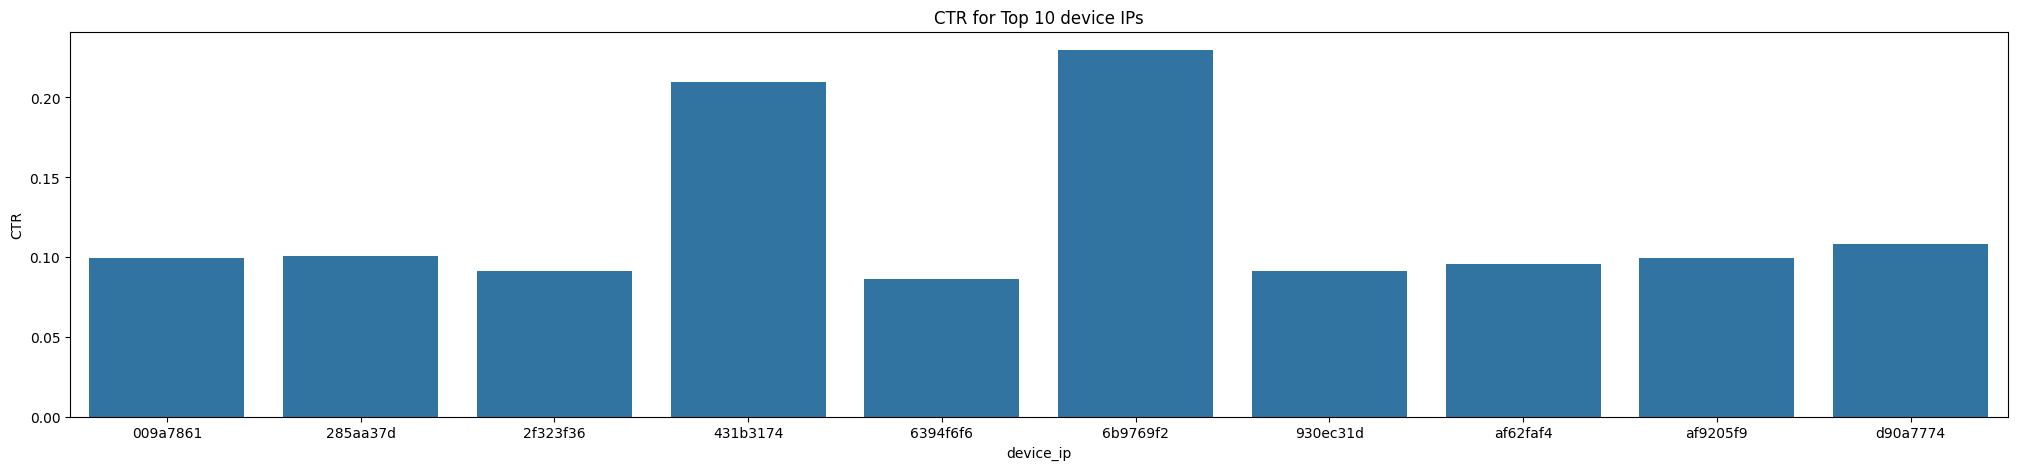

In [161]:
df_deviceip=top_10_devices_ip_df.groupby(['device_ip','click']).size().unstack()
df_deviceip['CTR']= df_deviceip[1]/(df_deviceip[0]+df_deviceip[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_deviceip['CTR'].values,x=df_deviceip.index)
plt.ylabel('CTR')
plt.title('CTR for Top 10 device IPs')
plt.show()

Unlike device IDs, device IPs CTRs are very much high with higher views/clicks. This is again a very interesting feature for our classification.

##### Engineered Feature II: device_ip_counts

In [9]:
device_ip_counts = df['device_ip'].value_counts()

df['device_ip_counts'] = df['device_ip'].map(device_ip_counts)

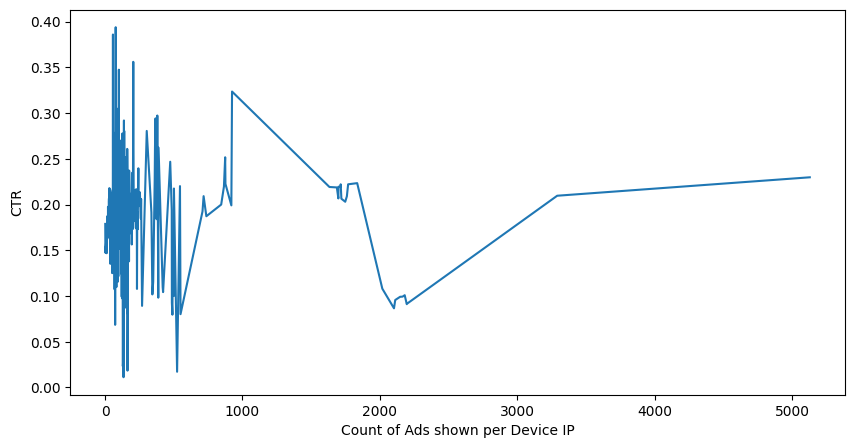

In [163]:
df_deviceip=df.groupby(['device_ip_counts','click']).size().unstack()
df_deviceip['CTR']= df_deviceip[1]/(df_deviceip[0]+df_deviceip[1])
plt.figure(figsize=(10,5))
plt.plot(df_deviceip['CTR'])
plt.xlabel('Count of Ads shown per Device IP')
plt.ylabel('CTR')
plt.show()

The CTR, from the graph above, is high for the users who are shown the less than 600 ads.

##### device_model

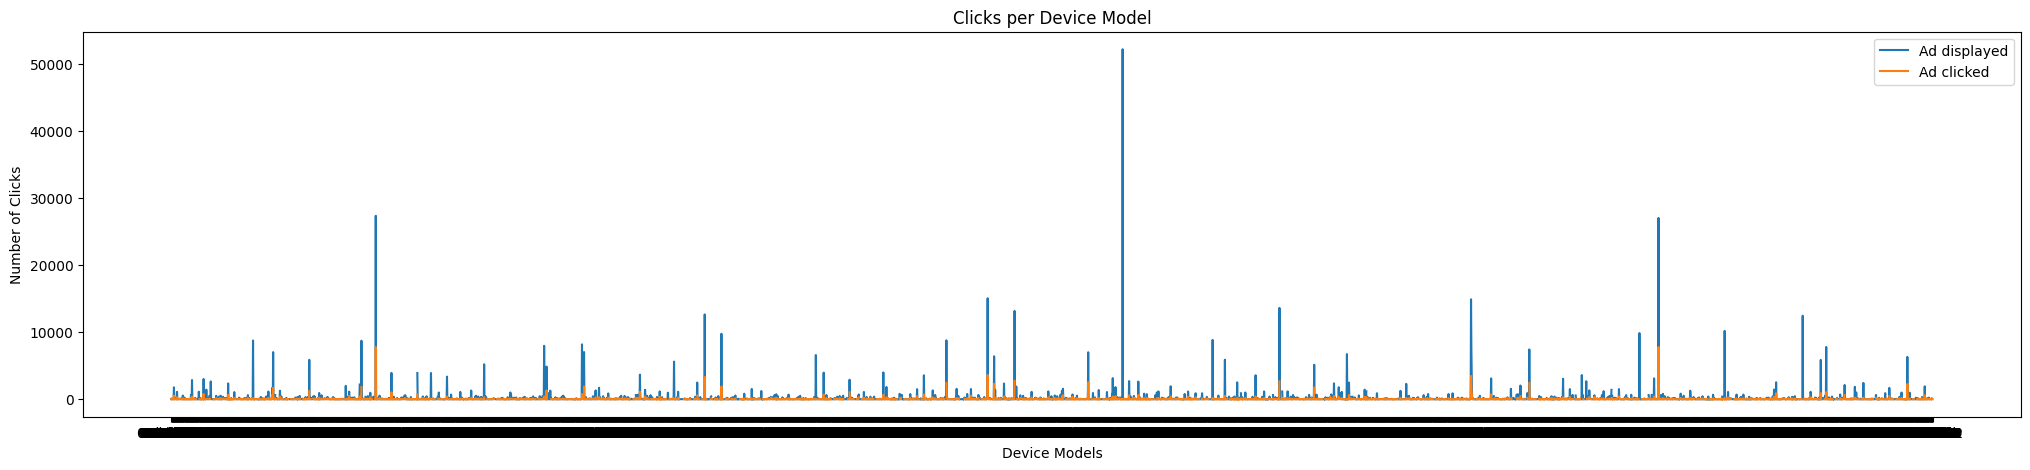

In [172]:
plt.figure(figsize=(25,5))
plt.plot(df.groupby(['device_model','click']).size().unstack())
plt.ylabel('Number of Clicks')
plt.xlabel('Device Models')
plt.title('Clicks per Device Model')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

There are only a few device models where the views are very high. In this plot, there is a device model where the number of impressions is very large which suggests it is used by several people.

Let's analyse CTR per device model now

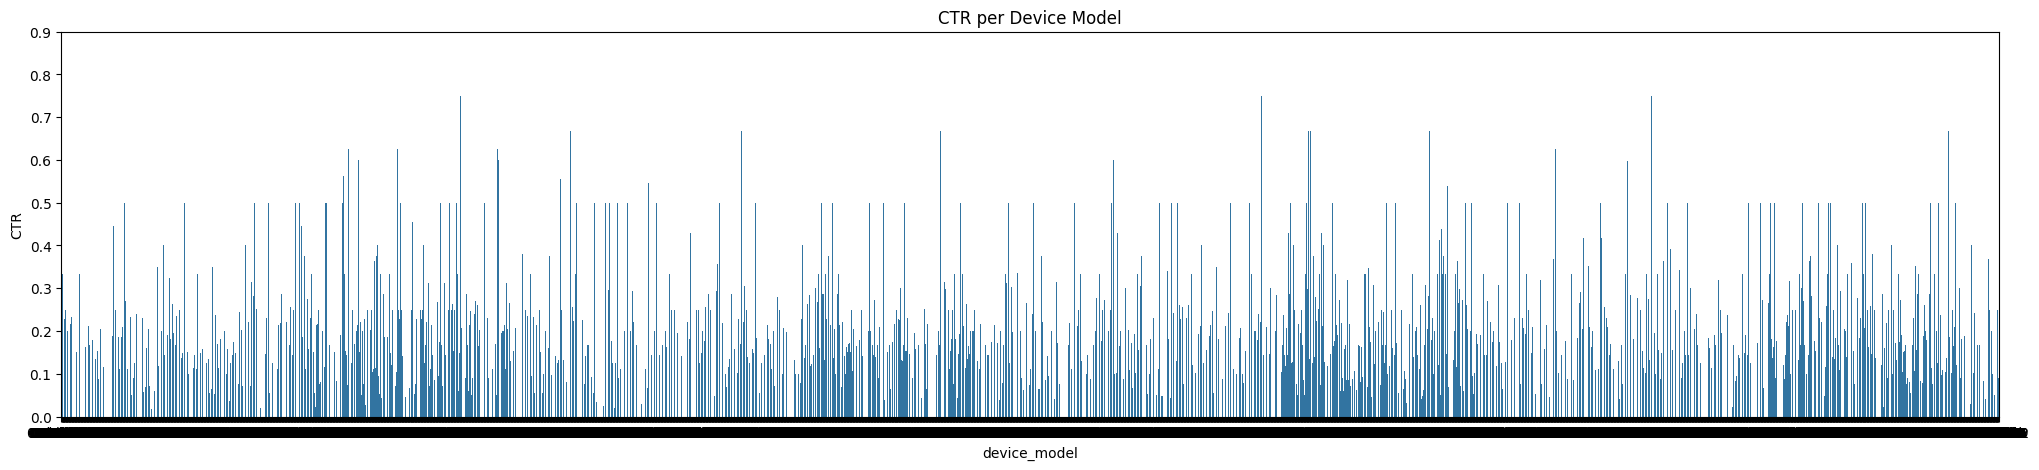

In [173]:
df_devicemodel=df.groupby(['device_model','click']).size().unstack()
df_devicemodel['CTR']= df_devicemodel[1]/(df_devicemodel[0]+df_devicemodel[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_devicemodel['CTR'].values,x=df_devicemodel.index)
plt.ylabel('CTR')
plt.title('CTR per Device Model')
plt.show()

The CTR values here do not seem to be that affected by how skewed the views are but the trend in the plot is useful for our classification purpose.

##### device_type

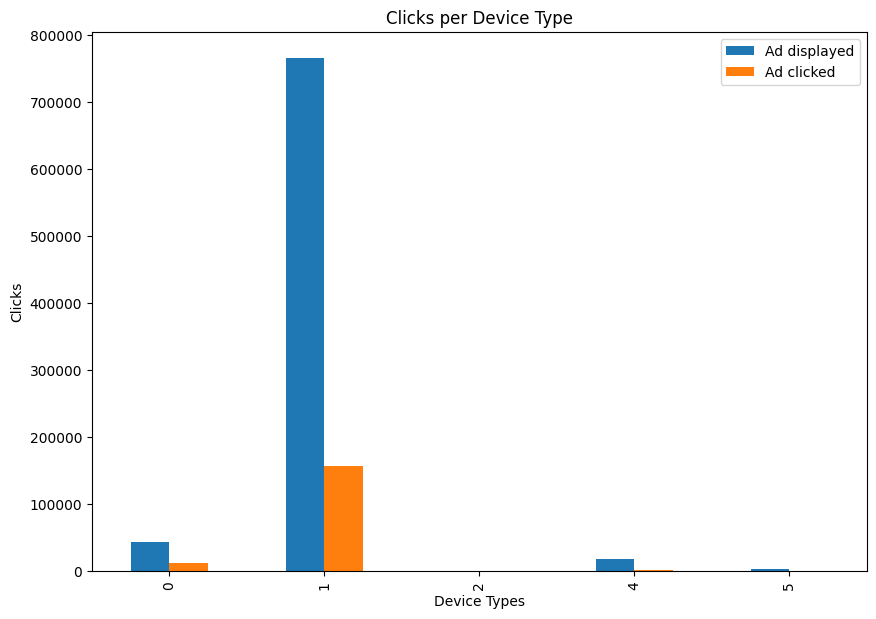

In [176]:
df.groupby(['device_type','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Clicks')
plt.xlabel('Device Types')
plt.title('Clicks per Device Type')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

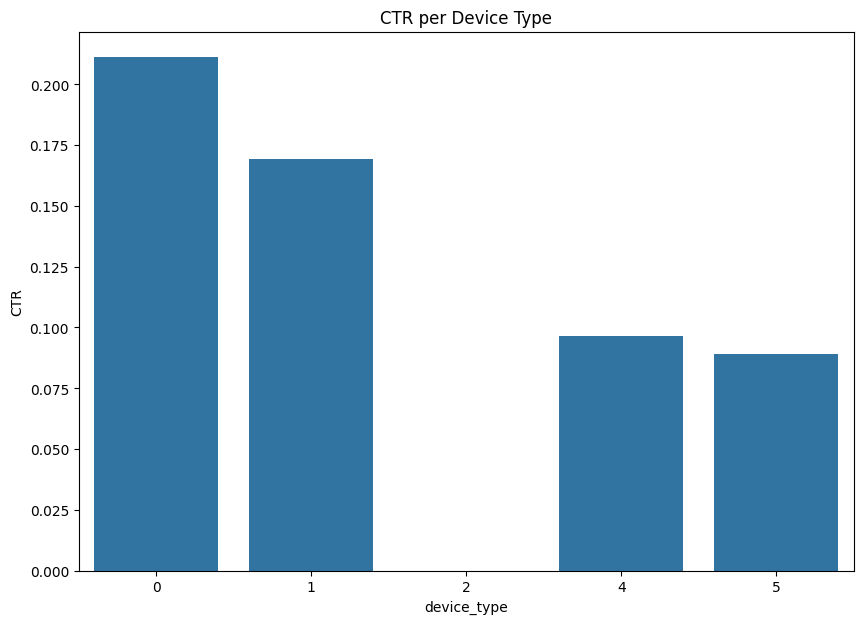

In [178]:
df_devicetype=df.groupby(['device_type','click']).size().unstack()
df_devicetype['CTR']= df_devicetype[1]/(df_devicetype[0]+df_devicetype[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_devicetype['CTR'].values,x=df_devicetype.index)
plt.ylabel('CTR')
plt.title('CTR per Device Type')
plt.show()

The most dominating device types are type 1 and 0 and from the view/clicks plot, it seems that device type 1 is the most common device type used. 
The CTR of the device type 1 is less than the CTR of device type 0 even though device 0 has lesser views compared to device type 1. Maybe device 1 represents mobiles and device 0 represents something used by older people who are more prone to click on ads.

##### device_conn_type

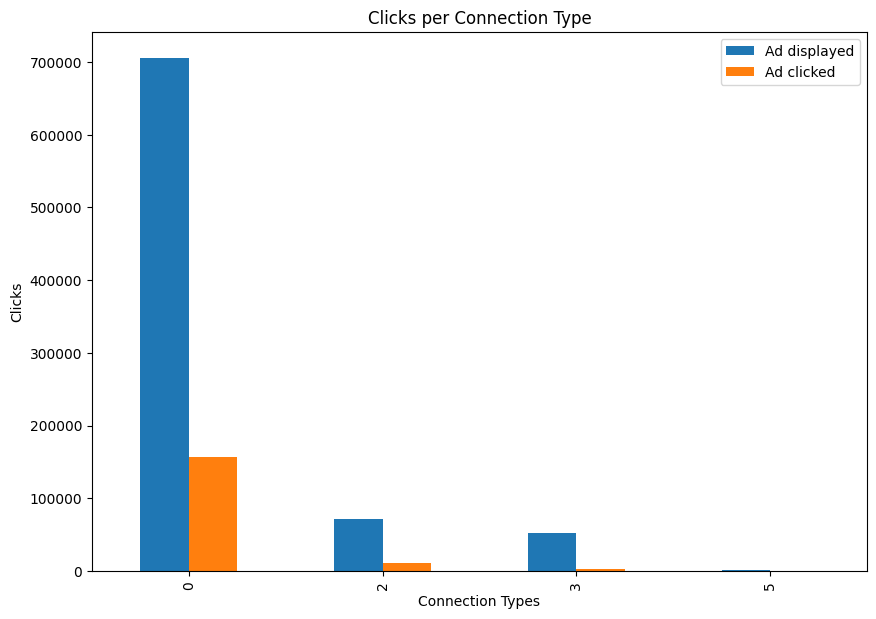

In [18]:
df.groupby(['device_conn_type','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Clicks')
plt.xlabel('Connection Types')
plt.title('Clicks per Connection Type')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

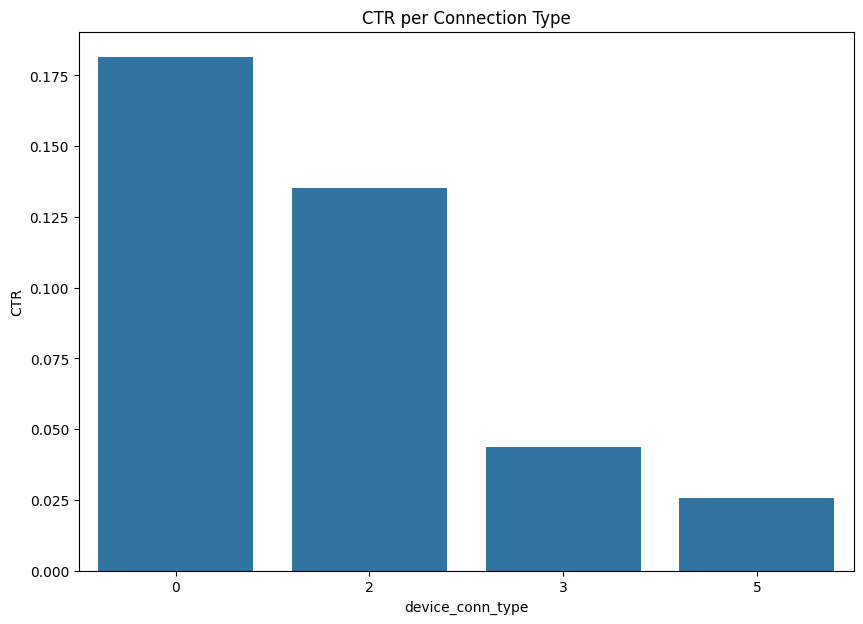

In [181]:
df_connection=df.groupby(['device_conn_type','click']).size().unstack()
df_connection['CTR']= df_connection[1]/(df_connection[0]+df_connection[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_connection['CTR'].values,x=df_connection.index)
plt.ylabel('CTR')
plt.title('CTR per Connection Type')
plt.show()

The CTR for connection type 0 has the highest CTR which is proportional to the number of views as seen from the plot above it. This suggests a trend such that the more the connection types' views, the more CTR. Hence, this feature seems useful for our classification task.

## Anonymized Categorical Features EDA

##### C1

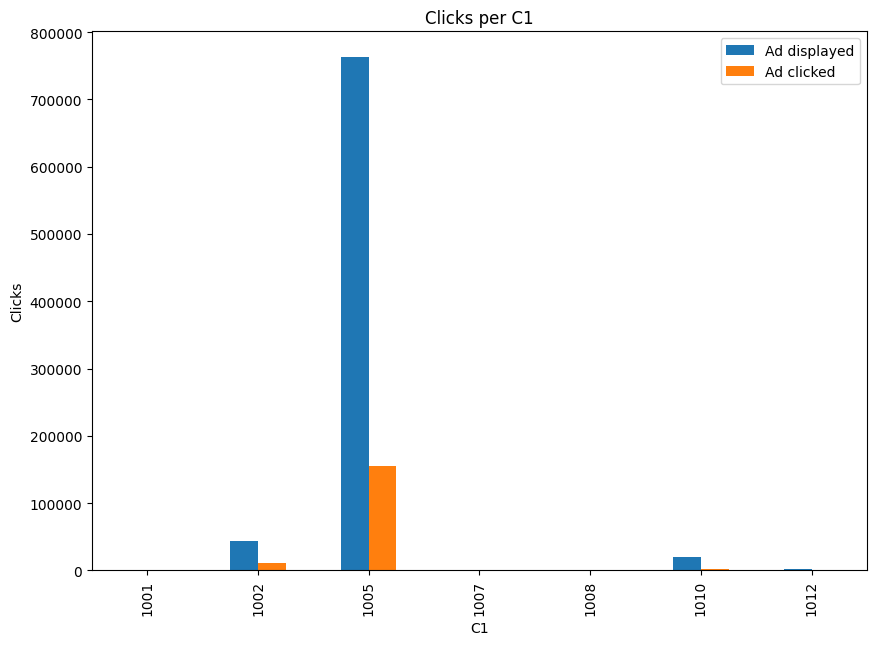

In [19]:
df.groupby(['C1','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Clicks')
plt.xlabel('C1')
plt.title('Clicks per C1')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

From the above plot, the most common value this feature has is 1005. Let's look at its CTR

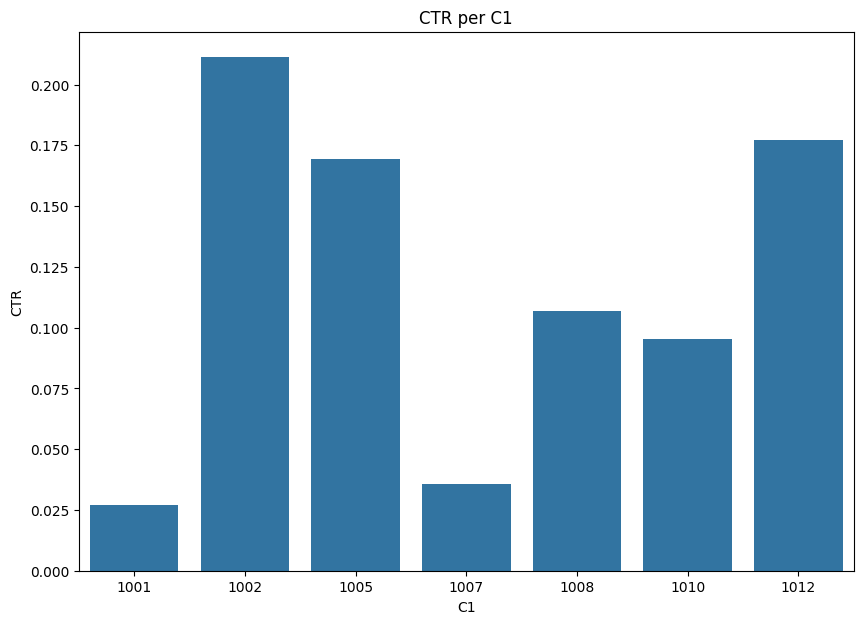

In [20]:
df_c1=df.groupby(['C1','click']).size().unstack()
df_c1['CTR']= df_c1[1]/(df_c1[0]+df_c1[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_c1['CTR'].values,x=df_c1.index)
plt.ylabel('CTR')
plt.title('CTR per C1')
plt.show()

There's a trend here as well, we could clearly observe that 1002 has more CTR than 1005 despite 1005 being the most common value of the C1.

##### C14

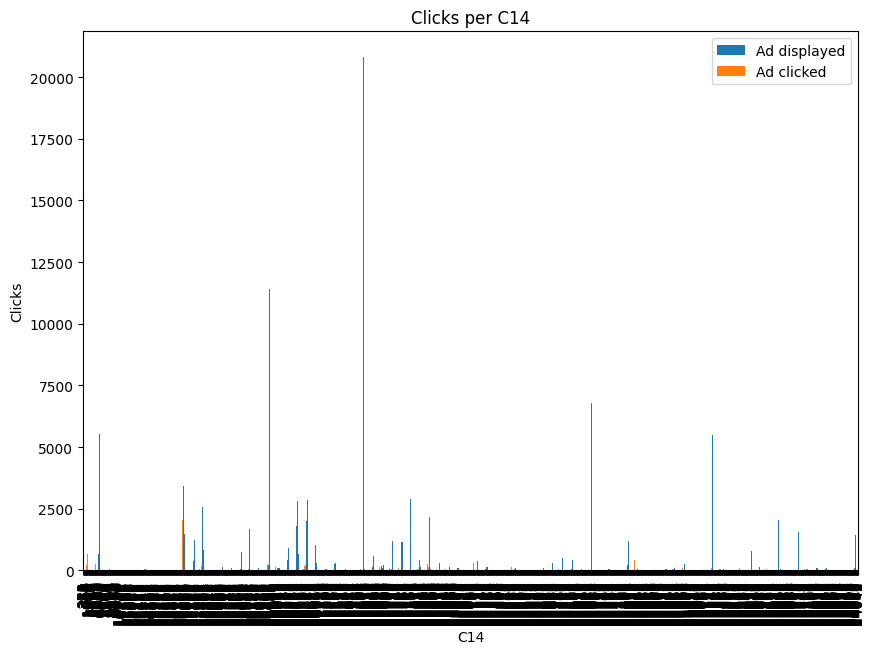

In [21]:
df.groupby(['C14','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Clicks')
plt.xlabel('C14')
plt.title('Clicks per C14')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

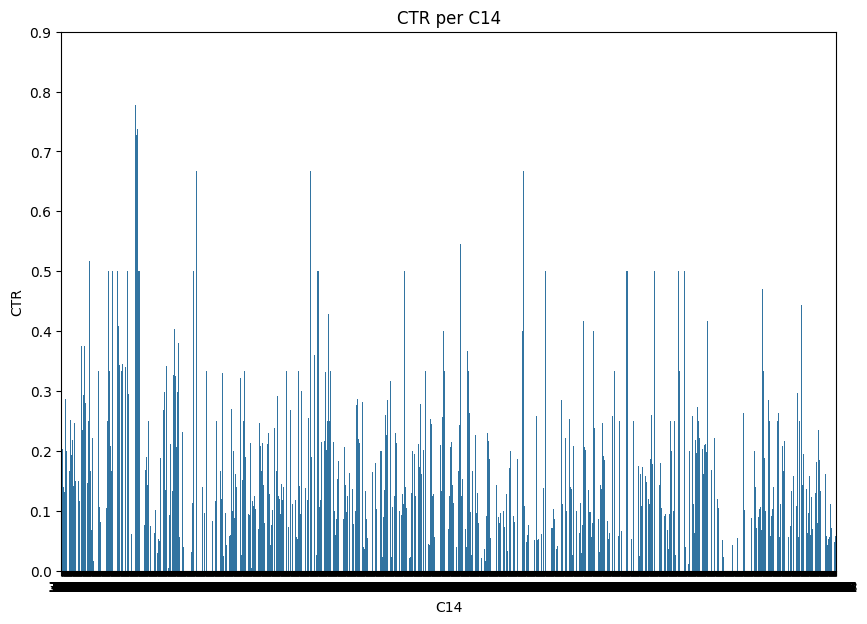

In [22]:
df_c14=df.groupby(['C14','click']).size().unstack()
df_c14['CTR']= df_c14[1]/(df_c14[0]+df_c14[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_c14['CTR'].values,x=df_c14.index)
plt.ylabel('CTR')
plt.title('CTR per C14')
plt.show()

There is a nice trend in the CTR which will be useful for classification later.


##### C15

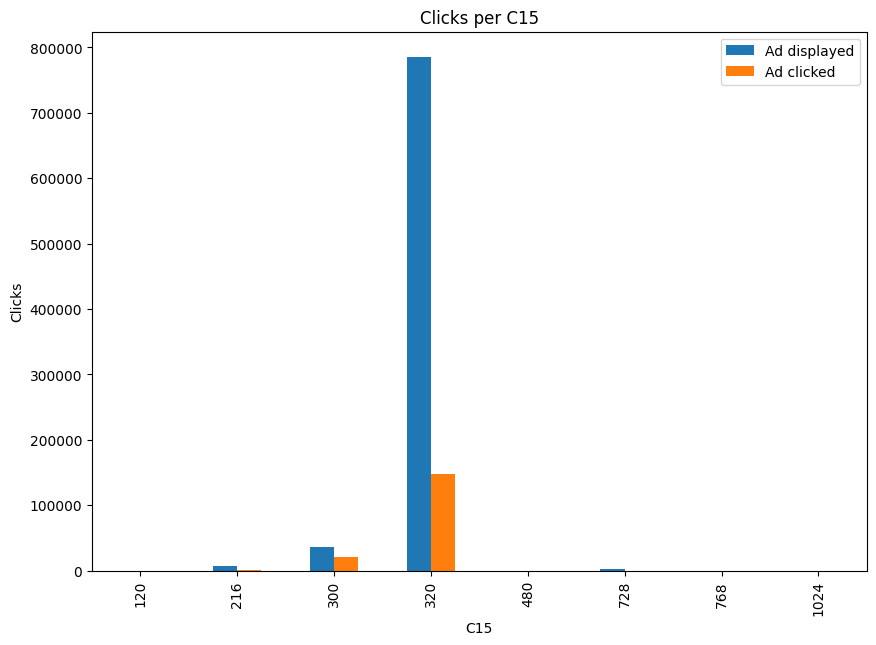

In [23]:
df.groupby(['C15','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Clicks')
plt.xlabel('C15')
plt.title('Clicks per C15')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

From the above plot, the values taken by C15 also correspond to resolutions (number of pixels). Maybe the width of the ad. 

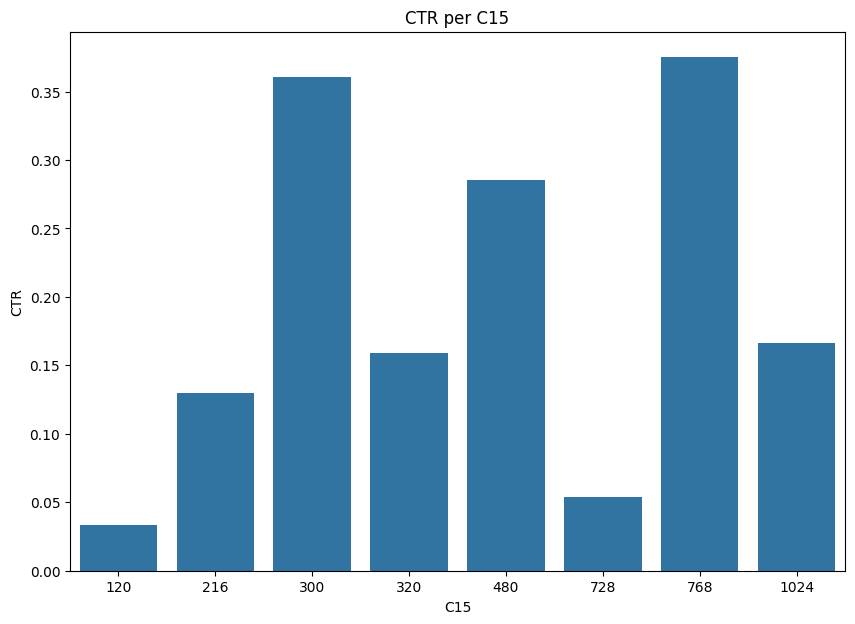

In [25]:
df_c15=df.groupby(['C15','click']).size().unstack()
df_c15['CTR']= df_c15[1]/(df_c15[0]+df_c15[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_c15['CTR'].values,x=df_c15.index)
plt.ylabel('CTR')
plt.title('CTR per C15')
plt.show()

If it is resolutions, then full screen ads contribute a lote to CTR decently as 768 has one of the highest CTRs of 30%+ followed by 300. Maybe relatively bigger ads have more chance of getting clicked by the user.

##### C16

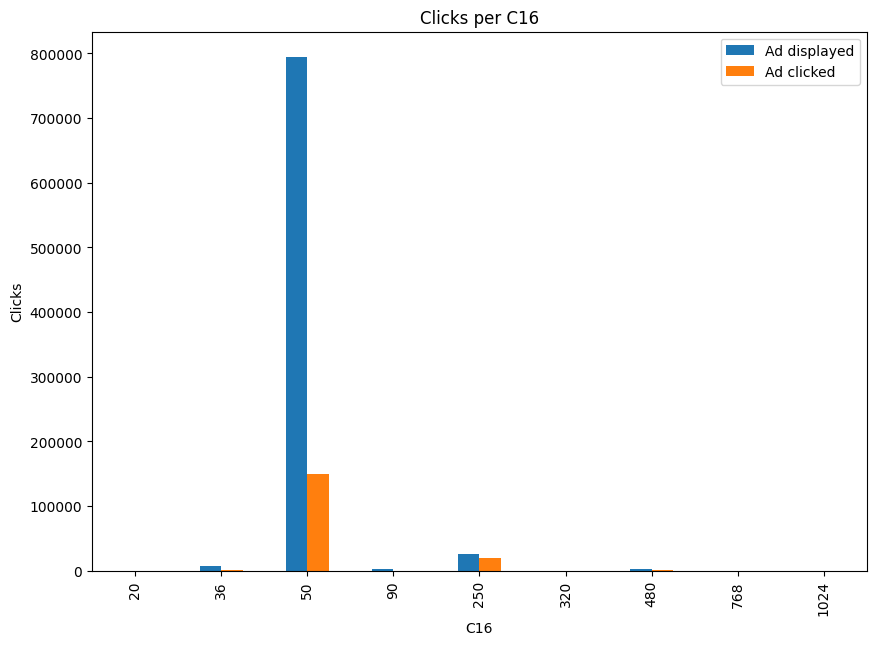

In [26]:
df.groupby(['C16','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Clicks')
plt.xlabel('C16')
plt.title('Clicks per C16')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

From the above plot, the values taken by C16 also correspond to resolutions (number of pixels). Maybe the height of the ad. 

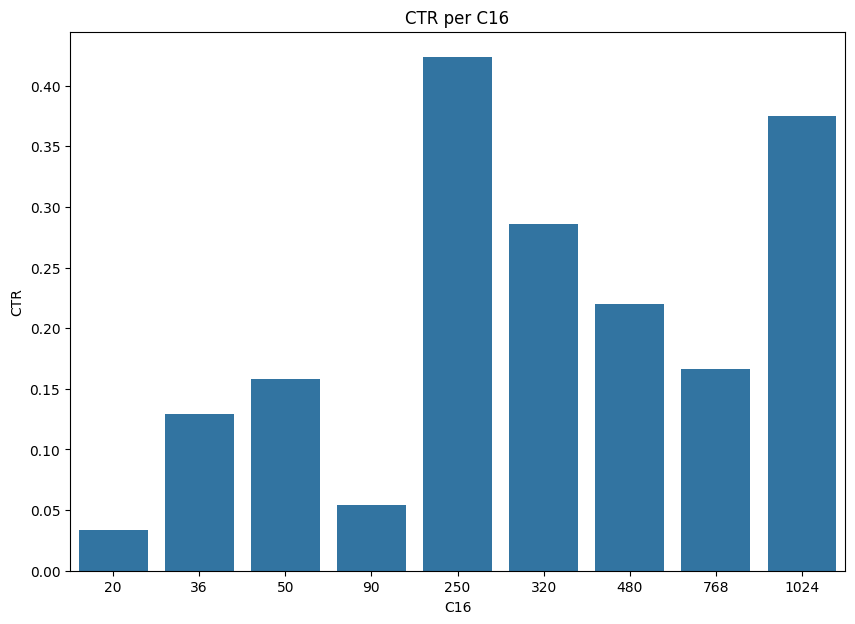

In [28]:
df_c16=df.groupby(['C16','click']).size().unstack()
df_c16['CTR']= df_c16[1]/(df_c16[0]+df_c16[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_c16['CTR'].values,x=df_c16.index)
plt.ylabel('CTR')
plt.title('CTR per C16')
plt.show()

If it is resolutions, then full screen ads contribute a lote to CTR decently as 1024 has one of the highest CTRs of 40%+ followed by 250. Maybe relatively bigger ads have more chance of getting clicked by the user.


##### C21

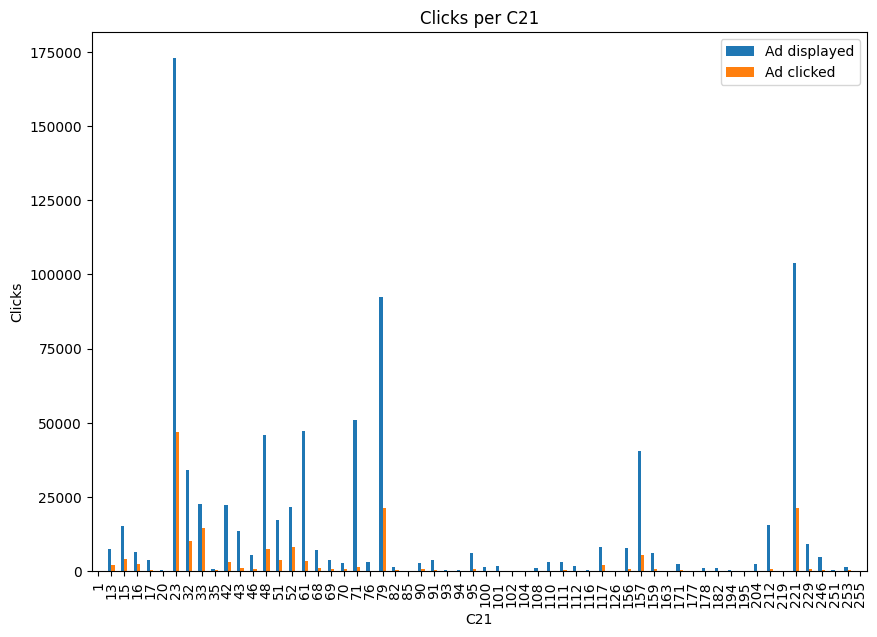

In [29]:
df.groupby(['C21','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Clicks')
plt.xlabel('C21')
plt.title('Clicks per C21')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

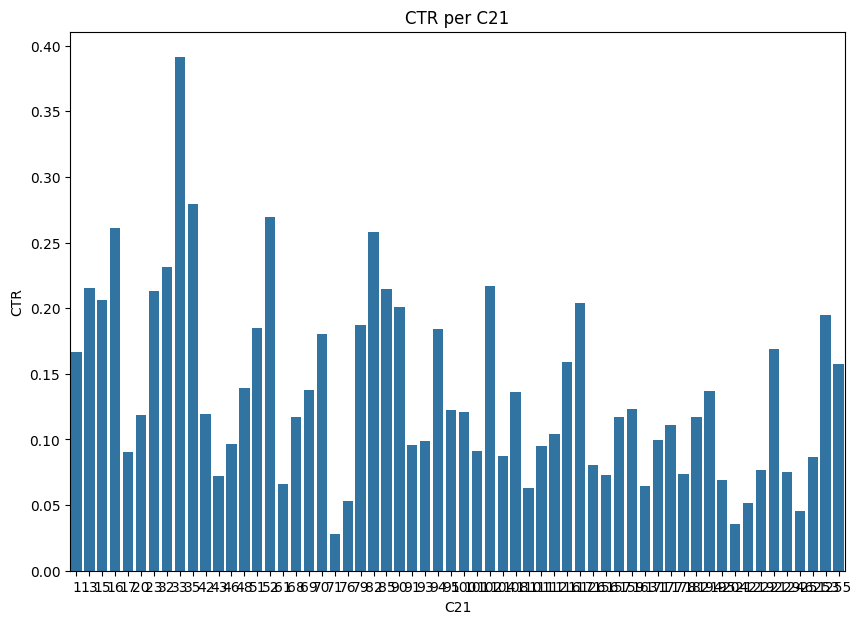

In [30]:
df_c21=df.groupby(['C21','click']).size().unstack()
df_c21['CTR']= df_c21[1]/(df_c21[0]+df_c21[1])
plt.figure(figsize=(10,7))
sns.barplot(y=df_c21['CTR'].values,x=df_c21.index)
plt.ylabel('CTR')
plt.title('CTR per C21')
plt.show()

More number of impressions does not suggest more CTR, however there is a trend that helps us in distiguishing ads with high CTR. Hence, C21 is a useful feature

## EDA of hour, day, and time features

##### hour

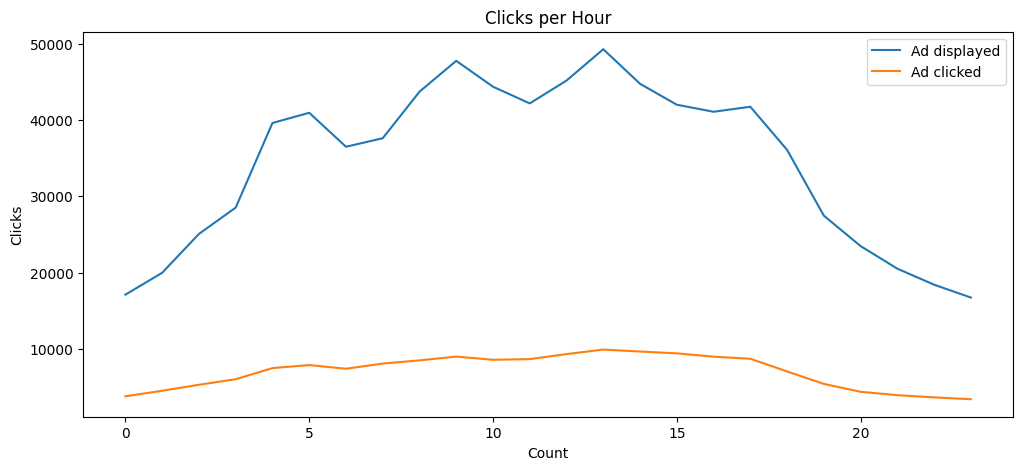

In [342]:
plt.figure(figsize=(12,5))
plt.plot(df.groupby(['hour','click']).size().unstack())
plt.ylabel('Clicks')
plt.xlabel('Count')
plt.title('Clicks per Hour')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

From above, the the number of clicks are the highest between 1 pm and 2 pm mostly. Perhaps that represents people loooking at ads during their lunch time. The least number of clicks are mostly at midnight. 

In [343]:
df_hourclick=df.groupby(['hour','click']).size().unstack()
df_hourclick['CTR']= df_hourclick[1]/(df_hourclick[0]+df_hourclick[1])
df_hourclick.head()

click,0,1,CTR
hour,,,
0,17137,3831,0.182707
1,20000,4562,0.185734
2,25083,5341,0.175552
3,28529,6067,0.175367
4,39600,7524,0.159664


[2024-04-07 18:09:05,597.597] -     INFO: matplotlib.category -- Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-04-07 18:09:05,607.607] -     INFO: matplotlib.category -- Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


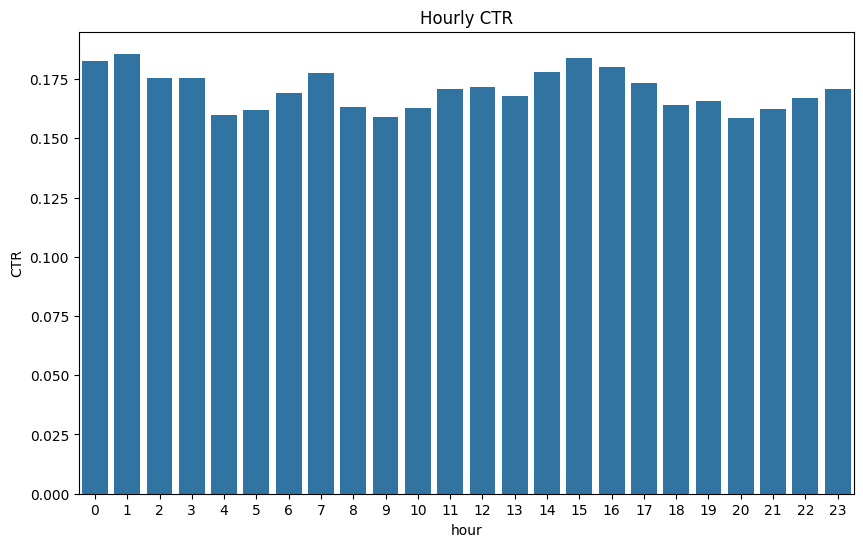

In [344]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_hourclick['CTR'].values,x=df_hourclick.index)
plt.ylabel('CTR')
plt.title('Hourly CTR')
plt.show()

From above, the maximum CTR is between 1am to 2am, but there is no clear trend that significantly seperates the clicks and views. Hence, I don't think that 'hour' alone is a useful feature for prediction.

##### day

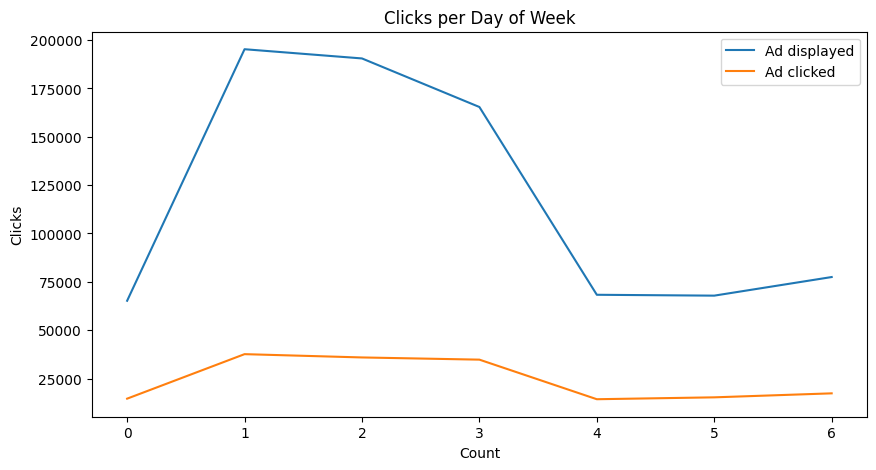

In [348]:
df_dayclick=df.groupby(['day','click']).size().unstack()
plt.figure(figsize=(10,5))
plt.plot(df_dayclick)
plt.ylabel('Clicks')
plt.xlabel('Count')
plt.title('Clicks per Day of Week')
plt.legend(['Ad displayed','Ad clicked'])
plt.show()

From above, the middle days of the week have more clicks in general and the trend is similar to the hour plot.

In [349]:
df_dayclick['CTR']= df_dayclick[1]/(df_dayclick[0]+df_dayclick[1])
df_dayclick.head()

click,0,1,CTR
day,,,
0,65226,14624,0.183143
1,195252,37628,0.161577
2,190486,35926,0.158675
3,165384,34789,0.173795
4,68320,14331,0.173392


[2024-04-07 18:37:33,636.636] -     INFO: matplotlib.category -- Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-04-07 18:37:33,639.639] -     INFO: matplotlib.category -- Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


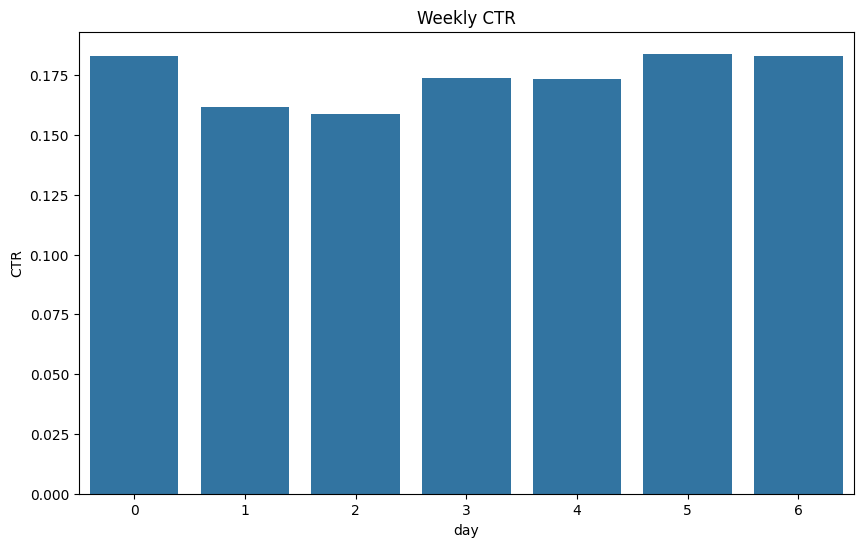

In [350]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_dayclick['CTR'].values,x=df_dayclick.index)
plt.ylabel('CTR')
plt.title('Weekly CTR')
plt.show()

Again, there is no obvious trend in the CTR values for days of the week, so I don't think I'll be considering 'days' as a feature in our prediction.

##### Engineered Feature III: hourly_user_count

Here I will consider each unique device_ip as a unique user to help me count users per hour.

In [10]:
df_hourr=df[['hour','device_ip']].groupby(['hour']).count()

In [193]:
df_hourr

,device_ip
hour,
0,20968
1,24562
2,30424
3,34596
4,47124
5,48857
6,43930
7,45721
8,52234


In [11]:
from tqdm import tqdm
user_count=[]
for index in tqdm(df['hour']):
    user_count.append(df_hourr['device_ip'][index])

100%|██████████| 1000000/1000000 [00:02<00:00, 419809.78it/s]


In [12]:
df['hourly_user_count']=user_count

In [36]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C16,C17,C18,C19,C20,C21,day,device_ip_counts,device_id_counts,hourly_user_count
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,50,423,2,39,100148,32,2,1,824918,51443
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,50,2039,2,39,100077,32,3,1,1,45721
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,50,2619,1,163,100055,71,0,1,824918,50864
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,50,2676,0,35,100176,221,2,4,824918,34596
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,50,761,3,175,100081,23,2,3,824918,30424


Let's analyze the impact of this new engineered feature

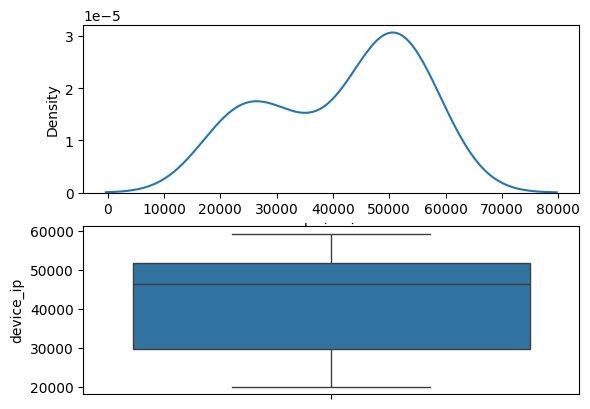

<Figure size 1000x700 with 0 Axes>

In [202]:
f, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize=(10,7))
sns.kdeplot(df_hourr['device_ip'], ax=ax1)
sns.boxplot(x=None,y='device_ip',data=df_hourr, ax=ax2)
plt.show()

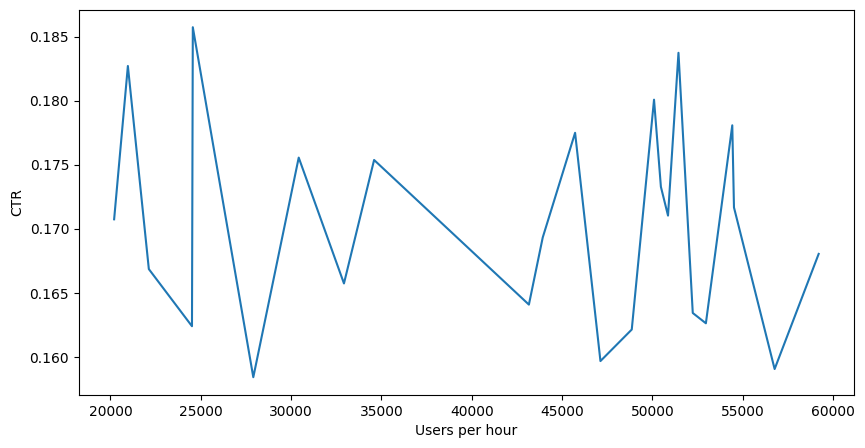

In [351]:
df_hour=df.groupby(['hourly_user_count','click']).size().unstack()
df_hour['CTR']= df_hour[1]/(df_hour[0]+df_hour[1])
plt.figure(figsize=(10,5))
plt.plot(df_hour['CTR'])
plt.xlabel('Users per hour')
plt.ylabel('CTR')
plt.show()

There is a good trend above and this engineered feature will be very useful in prediction, according to me.

##### Engineered Feature IV: daily_user_count

In [13]:
df_dayy=df[['day','device_ip']].groupby(['day']).count()

In [14]:
from tqdm import tqdm
user_count=[]
for index in tqdm(df['day']):
    user_count.append(df_dayy['device_ip'][index])

100%|██████████| 1000000/1000000 [00:02<00:00, 406543.74it/s]


In [15]:
df['daily_user_count']=user_count

Let's analyse the impact of this new engineered feature

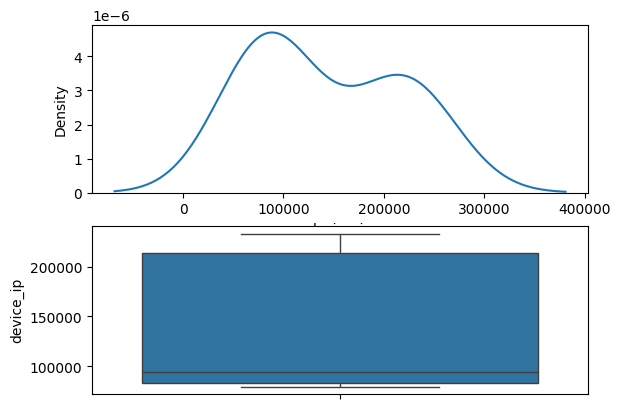

<Figure size 1000x700 with 0 Axes>

In [39]:
f, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize=(10,7))
sns.kdeplot(df_dayy['device_ip'], ax=ax1)
sns.boxplot(x=None,y='device_ip',data=df_dayy, ax=ax2)
plt.show()

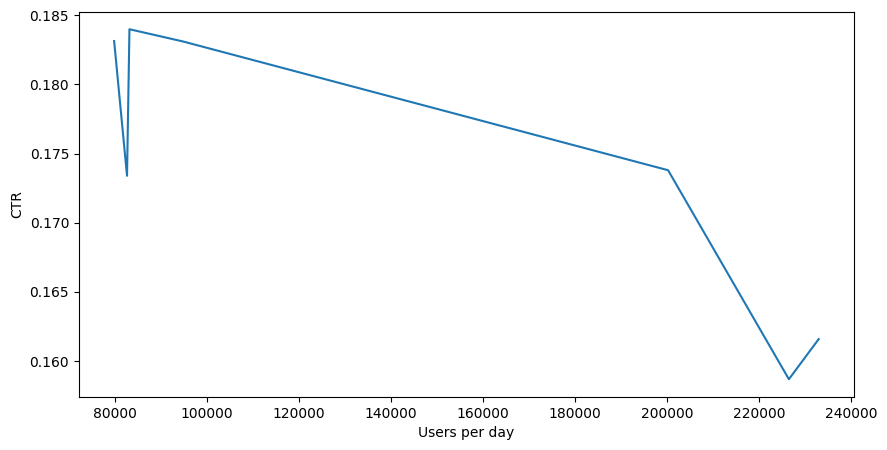

In [390]:
df_dayyclick=df.groupby(['daily_user_count','click']).size().unstack()
df_dayyclick['CTR']= df_dayyclick[1]/(df_dayyclick[0]+df_dayyclick[1])
plt.figure(figsize=(10,5))
plt.plot(df_dayyclick['CTR'])
plt.xlabel('Users per day')
plt.ylabel('CTR')
plt.show()

There is a downward trend for most of the plot above, which might be really really useful in prediction, in my opinion. I will keep this engineered feature.

##### Engineered Feature V: hourly_adview_count

Here I will consider each unique id as a unique ad to help me count ads viewed/shown per hour.

In [353]:
df_hourid=df[['hour','id']].groupby(['hour']).count()

In [354]:
df_hourid

,id
hour,
0,20968
1,24562
2,30424
3,34596
4,47124
5,48857
6,43930
7,45721
8,52234


In [355]:
from tqdm import tqdm
ad_count=[]
for index in tqdm(df['hour']):
    ad_count.append(df_hourid['id'][index])

100%|██████████| 1000000/1000000 [00:02<00:00, 418208.48it/s]


In [356]:
df['hourly_adview_count'] = ad_count

Let's analyze this new engineered feature.

In [357]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,day,device_id_counts,device_ip_counts,hourly_user_count,hourly_adview_count
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,423,2,39,100148,32,2,824918,1,51443,51443
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,2039,2,39,100077,32,3,1,1,45721,45721
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,2619,1,163,100055,71,0,824918,1,50864,50864
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,2676,0,35,100176,221,2,824918,4,34596,34596
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,761,3,175,100081,23,2,824918,3,30424,30424


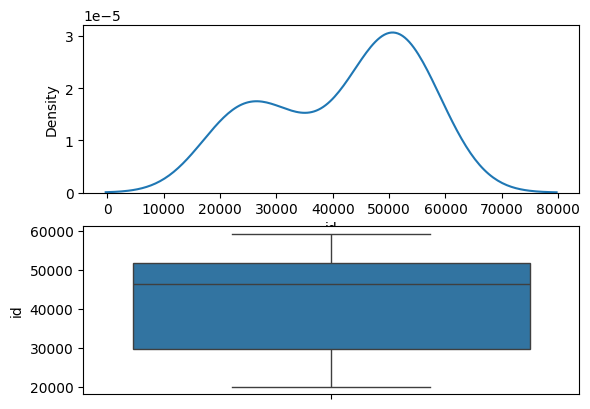

In [358]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(df_hourid['id'], ax=ax1)
sns.boxplot(x=None,y='id',data=df_hourid, ax=ax2)
plt.show()

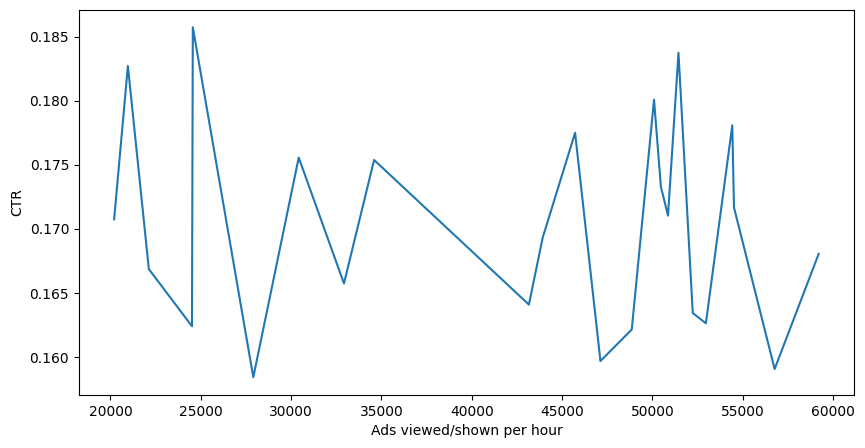

In [360]:
df_hr=df.groupby(['hourly_adview_count','click']).size().unstack()
df_hr['CTR']= df_hr[1]/(df_hr[0]+df_hr[1])
plt.figure(figsize=(10,5))
plt.plot(df_hr['CTR'])
plt.xlabel('Ads viewed/shown per hour')
plt.ylabel('CTR')
plt.show()

Again, there is a nice trend in the CTR value as shown above which suggests that this feature may be useful in predictions. However, I think that the hourly_user_count andhourly_adview_count have similar distributions of values, so I will not consider this engineered feature anymore.

In [372]:
df.drop('hourly_adview_count', axis=1, inplace=True)


# Splitting of dataset to get them ready for Modelling

In [41]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,day,device_ip_counts,device_id_counts,hourly_user_count,daily_user_count
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,423,2,39,100148,32,2,1,824918,51443,226412
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,2039,2,39,100077,32,3,1,1,45721,200173
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,2619,1,163,100055,71,0,1,824918,50864,79850
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,2676,0,35,100176,221,2,4,824918,34596,226412
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,761,3,175,100081,23,2,3,824918,30424,226412


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df,test_size=0.2, shuffle=False)
X_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,day,device_id_counts,device_ip_counts,hourly_user_count,daily_user_count
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,423,2,39,100148,32,2,824918,1,51443,226412
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,2039,2,39,100077,32,3,1,1,45721,200173
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,2619,1,163,100055,71,0,824918,1,50864,79850
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,2676,0,35,100176,221,2,824918,4,34596,226412
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,761,3,175,100081,23,2,824918,3,30424,226412


In [375]:
X_test.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C17,C18,C19,C20,C21,day,device_id_counts,device_ip_counts,hourly_user_count,daily_user_count
800000,1.443183e+19,1,22,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,2647,2,35,100148,23,2,824918,1,22128,226412
800001,1.211547e+19,0,18,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1722,0,35,100084,79,6,824918,1,43164,94858
800002,1.197271e+19,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,170f5944,2347f47a,...,2579,0,171,100094,108,5,824918,2,50864,83176
800003,6.949176e+18,0,6,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,2299,2,1327,-1,52,1,824918,231,43930,232880
800004,6.044170e+18,1,3,1005,1,e8f79e60,c4342784,f028772b,ecad2386,7801e8d9,...,2323,0,687,100081,48,1,824918,21,34596,232880


Let's check if there was a good split of data balance between the two groups.

In [17]:
X_train['click'].value_counts()/X_train.shape[0]

0    0.830235
1    0.169765
Name: click, dtype: float64

In [44]:
X_test['click'].value_counts()/X_test.shape[0]

0    0.829205
1    0.170795
Name: click, dtype: float64

The distributions are similar hence they have not changed much and we can proceed further.

# Training and Predictions using different Models

### Response/Target encoding of train and test data

Since all of our features selected above are categorical, I'm going to choose Target encoding that encodes categorical variables based on the relationship between the categorical values and the target variable, in my case I'll choose CTR for each feature.

In [18]:
from tqdm import tqdm

def target_fit(data,feature_name):
    
    # Calculating CTR for each feature
    df_dum=data.groupby([feature_name,'click']).size().unstack()
    df_dum['CTR']= df_dum[1]/(df_dum[0]+df_dum[1])
    
    # Dropping all null values
    df_dum.dropna(inplace=True)
    
    mean_CTR = df_dum['CTR'].mean()
    
    keys=list(df_dum.index)
    values=list(df_dum['CTR'].values)
    vocab_dict= {keys[i]:values[i] for i in range(len(keys))}
    
    # returning a dict to be used for transformation/encoding into vector later
    return vocab_dict,mean_CTR

def target_encode_transform(x,vocab,mean_CTR):
    vector=[] 
    
    # Converting encoded data into a vector row by row
    for row in x:
        vector.append(vocab.get(row,mean_CTR))
    
    return vector
       

Here I decided to drop id since it's pointless for prediction, hour and day since I used the new engineered features of hourly and daily user counts instead, device id and device ip since I used the new engineered features of device IP and device ID counts. I decided to use all the anonymized categorical variables since I didn't want to risk losing important information.

In [19]:
# features I chose for my prediction models
feature_chosen=['site_id','site_domain','site_category','app_id','app_category','app_domain',
                'device_model','device_type','device_conn_type','device_id_counts','device_ip_counts',
                'banner_pos','C1','C14','C15','C16','C17','C18','C19','C20','C21','hourly_user_count','daily_user_count']


X_train_pCTR=pd.DataFrame()
X_test_pCTR=pd.DataFrame()

for name in tqdm(feature_chosen):
    

    vocab,mean=target_fit(X_train,name) 
    
    X_train_pCTR[name] = target_encode_transform(X_train[name],vocab,mean)
    X_test_pCTR[name] = target_encode_transform(X_test[name],vocab,mean)

100%|██████████| 23/23 [00:05<00:00,  4.53it/s]


In [20]:
pd.isnull(X_test_pCTR).sum(axis=0)

site_id              0
site_domain          0
site_category        0
app_id               0
app_category         0
app_domain           0
device_model         0
device_type          0
device_conn_type     0
device_id_counts     0
device_ip_counts     0
banner_pos           0
C1                   0
C14                  0
C15                  0
C16                  0
C17                  0
C18                  0
C19                  0
C20                  0
C21                  0
hourly_user_count    0
daily_user_count     0
dtype: int64

It's clear that all null values were dropped.

In [21]:
X_train_pCTR.shape

(800000, 23)

In [22]:
y_train=X_train['click']
y_test=X_test['click']

### Performance Measure Function: Confusion matrix, Precision matrix, and Recall matrix 

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def performance_graphs(test_y, predict_y, y_score):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,6))
    
    labels = [0,1]
    cmap=sns.light_palette("blue")
    
    # Confusion Matrix
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    # Precision Matrix
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    # Recall Matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(test_y, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### Worst Model: Basis to find the worst log loss for Performance Measure

Log loss on Test Data using Random Model 0.8879075750465778


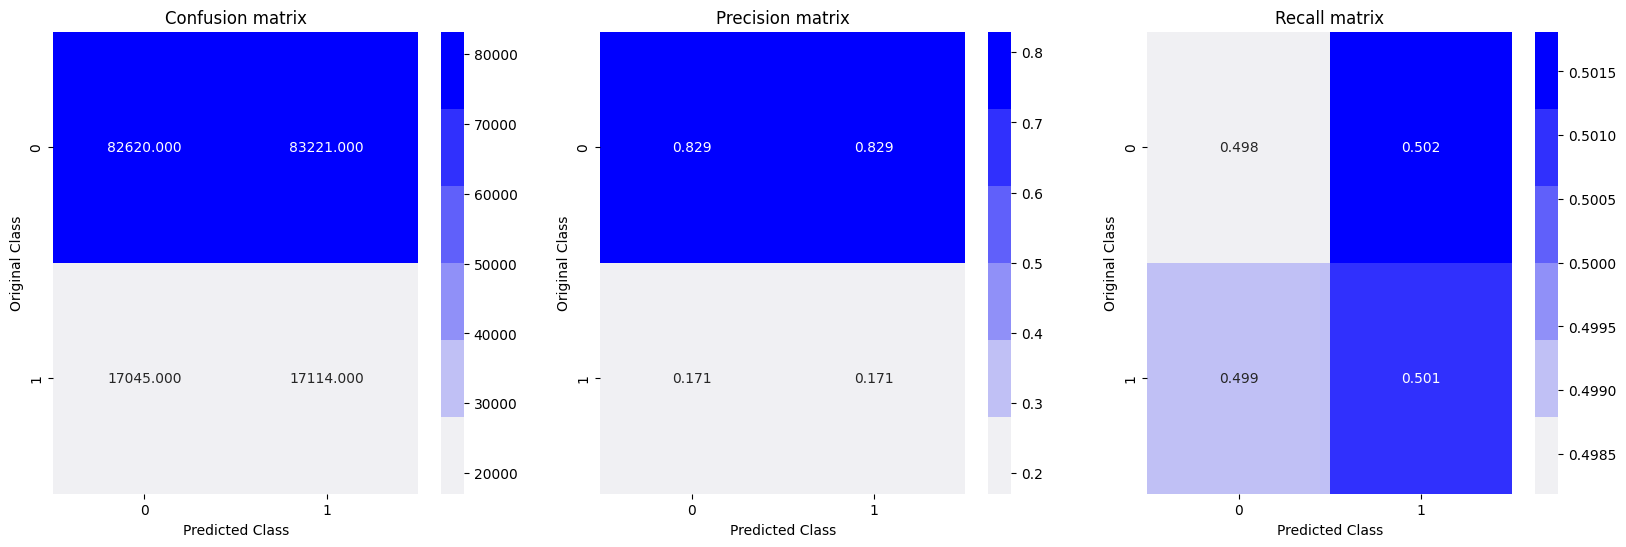

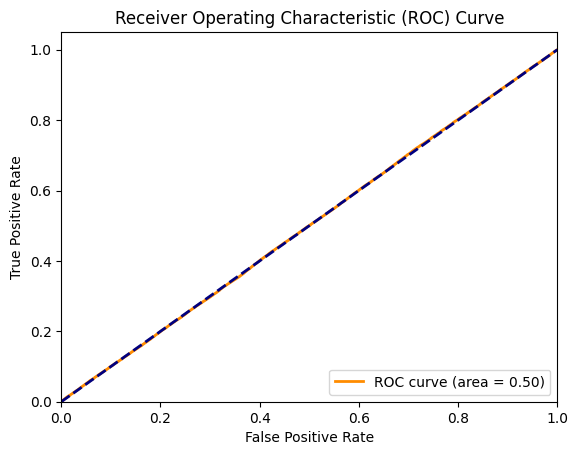

In [417]:
import numpy as np
from sklearn.metrics import log_loss

test_len= len(y_test);
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y))

y_score = np.random.rand(test_len)

predicted_y =np.argmax(predicted_y, axis=1)

performance_graphs(y_test, predicted_y, y_score)

### Stochastic Gradient Descent (SGD) Classifier Model (with hyperparameter tuning)

For alpha =  1e-05 The log loss is: 0.40885739855071174
For alpha =  0.0001 The log loss is: 0.4091079420382766
For alpha =  0.001 The log loss is: 0.41204102584610197
For alpha =  0.01 The log loss is: 0.41653689948240424
For alpha =  0.1 The log loss is: 0.41763033522001225
For alpha =  1 The log loss is: 0.4178764912084879
For alpha =  10 The log loss is: 0.4203962223497173


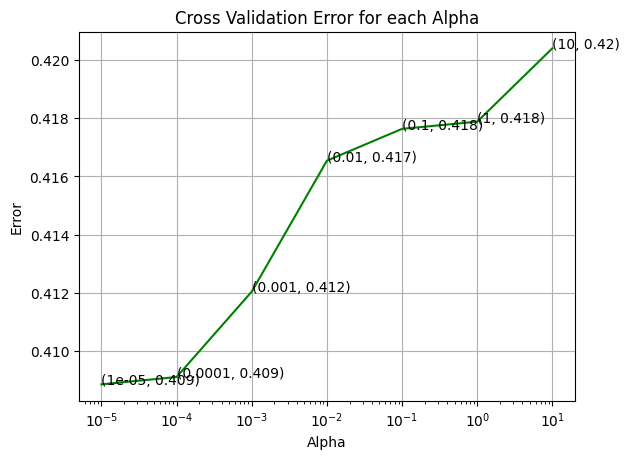

For values of best alpha =  1e-05 The train log loss is: 0.4032842810562333
For values of best alpha =  1e-05 The test log loss is: 0.4088071354244422


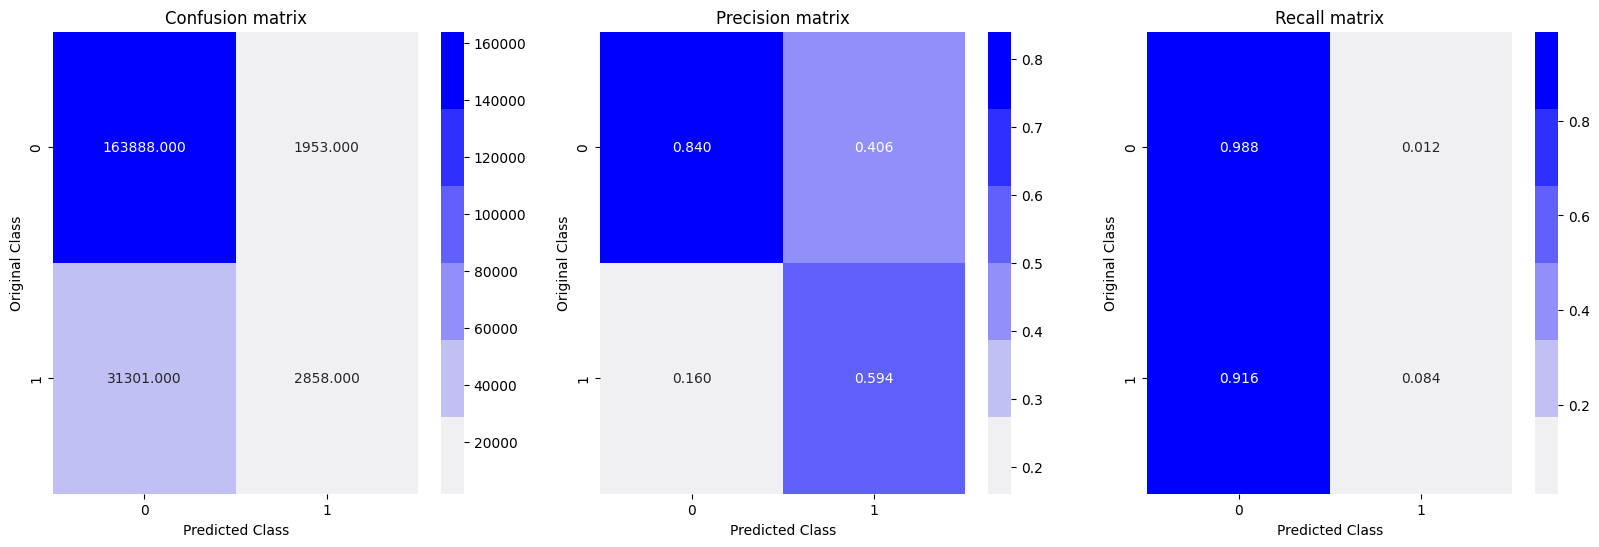

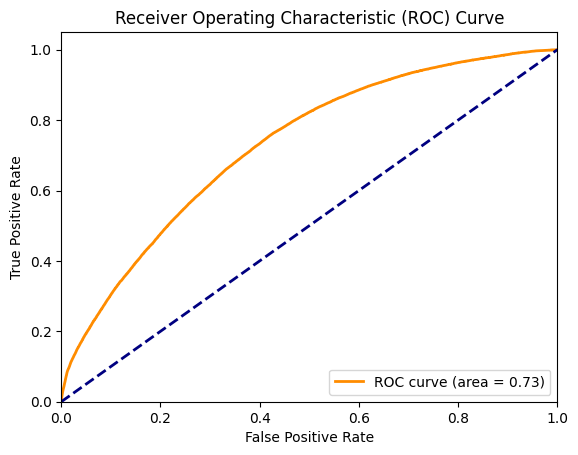

In [419]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

# hyperparameter
alpha = [10 ** x for x in range(-5, 2)] 

log_error_array=[]
for i in alpha:
    #chose l2 ridge regularization
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log_loss', class_weight= {0:1, 1:1.75})
    clf.fit(X_train_pCTR, y_train)
    # to tune hyperparameters
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_pCTR, y_train)
    predict_y = sig_clf.predict_proba(X_test_pCTR)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_))
    print('For alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array, c='g')
ax.set_xscale('log')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each Alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()


# we do both SGD and calibrate it to get the correct predicted probs for log_loss calculation
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log_loss')
clf.fit(X_train_pCTR, y_train)
# choosing sigmoid since it's a binary classification model
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_pCTR, y_train)

predict_y = sig_clf.predict_proba(X_train_pCTR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", log_loss(y_train, predict_y, labels=clf.classes_))
predict_y = sig_clf.predict_proba(X_test_pCTR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", log_loss(y_test, predict_y, labels=clf.classes_))
predicted_y =np.argmax(predict_y,axis=1)
performance_graphs(y_test, predicted_y, sig_clf.predict_proba(X_test_pCTR)[:,1])

### Logistic Regression Model (with hyperparameter tuning)

For alpha =  1e-05 the log loss is: 0.40895783661427637
For alpha =  0.0001 the log loss is: 0.4089578088494036
For alpha =  0.001 the log loss is: 0.4089581009292985
For alpha =  0.01 the log loss is: 0.40896097069474124
For alpha =  0.1 the log loss is: 0.4089115750816096
For alpha =  1 the log loss is: 0.40893836032712644
For alpha =  10 the log loss is: 0.4088942448162198


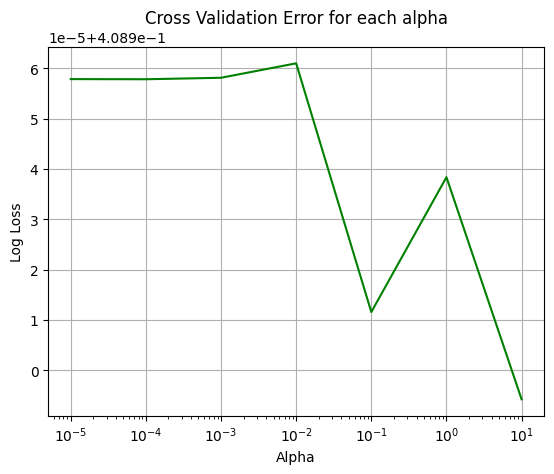

For the best alpha =  10 the train log loss is: 0.4034010833602796
For the best alpha =  10 the test log loss is: 0.4089094571852754


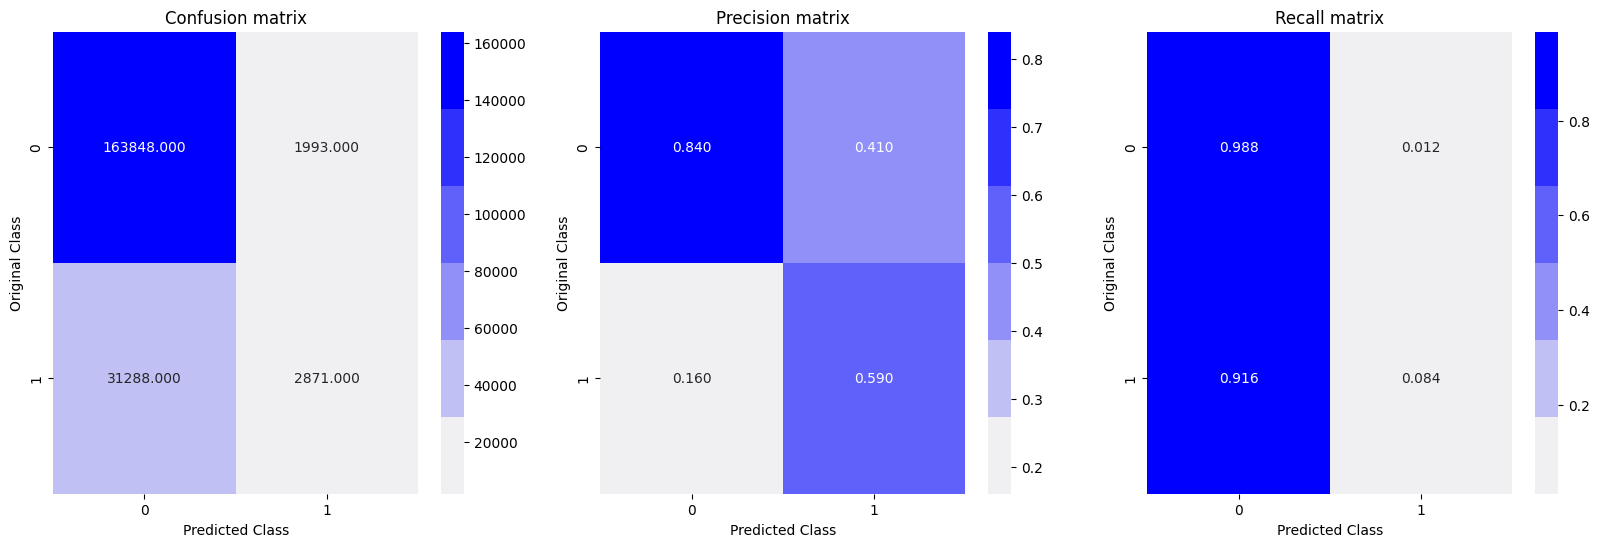

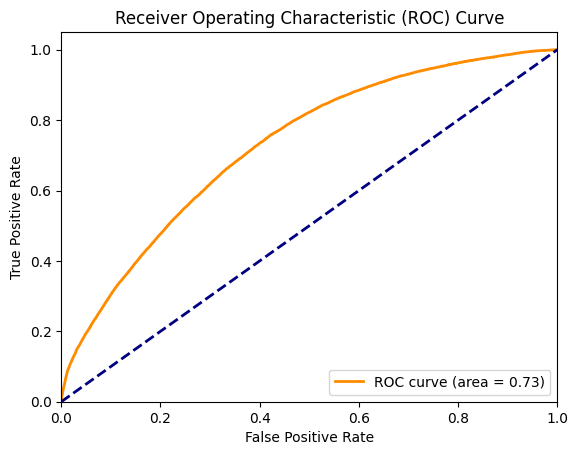

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# hyperparameter
alpha = [10 ** x for x in range(-5, 2)]

log_loss_array = []

for a in alpha:
    # Choosing L2 ridge regularization penalty
    clf = LogisticRegression(C=1/a, penalty='l2', class_weight={0: 1, 1: 1.75})
    
    clf.fit(X_train_pCTR, y_train)
    
    calibrated_clf = CalibratedClassifierCV(clf, method="sigmoid")
    calibrated_clf.fit(X_train_pCTR, y_train)
    
    predict_proba_y = calibrated_clf.predict_proba(X_test_pCTR)
    
    log_loss_array.append(log_loss(y_test, predict_proba_y, labels=clf.classes_))
    
    print('For alpha = ', a, 'the log loss is:', log_loss(y_test, predict_proba_y, labels=clf.classes_))

plt.plot(alpha, log_loss_array, c='g')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Log Loss")
plt.title("Cross Validation Error for each alpha")
plt.grid()
plt.show()

best_alpha = alpha[np.argmin(log_loss_array)]

clf = LogisticRegression(C=1/best_alpha, penalty='l2')
clf.fit(X_train_pCTR, y_train)

calibrated_clf = CalibratedClassifierCV(clf, method="sigmoid")
calibrated_clf.fit(X_train_pCTR, y_train)

train_predict_proba_y = calibrated_clf.predict_proba(X_train_pCTR)
print('For the best alpha = ', best_alpha, 'the train log loss is:', log_loss(y_train, train_predict_proba_y, labels=clf.classes_))

test_predict_proba_y = calibrated_clf.predict_proba(X_test_pCTR)
print('For the best alpha = ', best_alpha, 'the test log loss is:', log_loss(y_test, test_predict_proba_y, labels=clf.classes_))

predicted_y = np.argmax(test_predict_proba_y, axis=1)

performance_graphs(y_test, predicted_y, calibrated_clf.predict_proba(X_test_pCTR)[:,1])


### Random Forest Model

The test log loss with default hyperparameters is: 0.6089727313340287


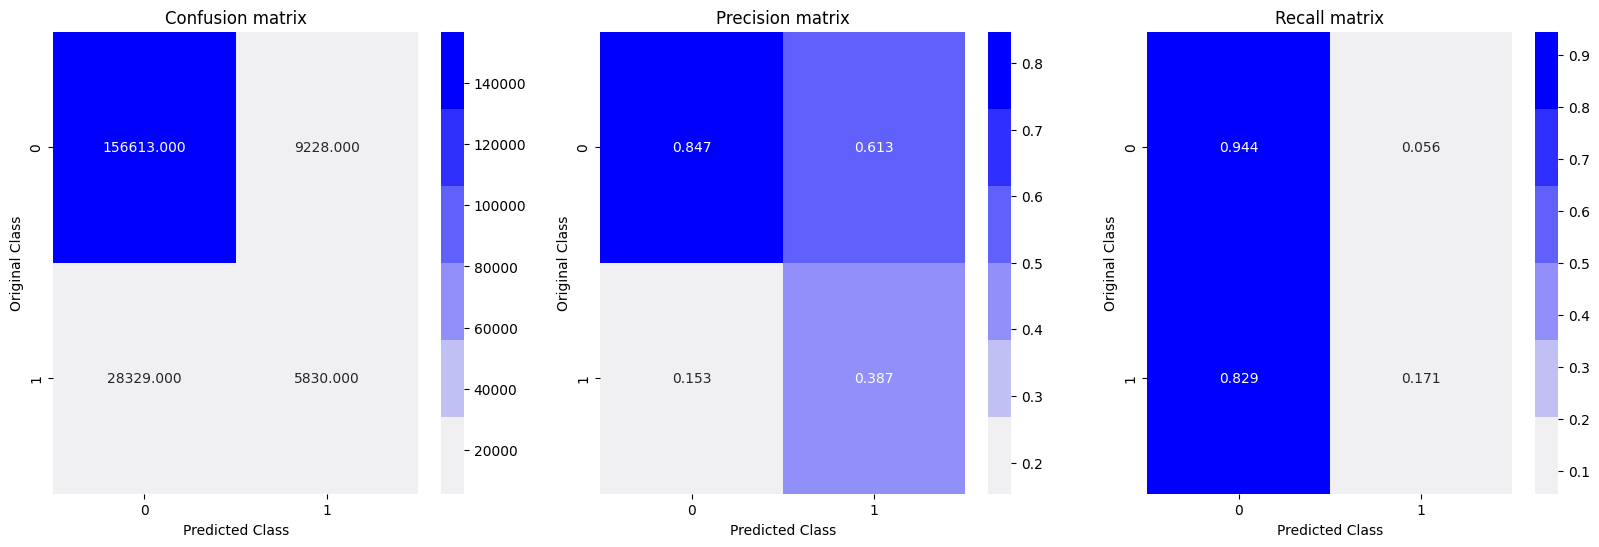

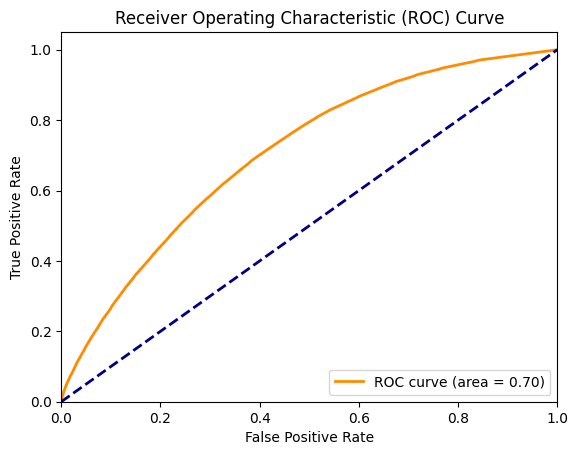

In [421]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameter tuning was too time complex, so I had to try with default ones
rf_clf = RandomForestClassifier(class_weight={0: 1, 1: 1.75})

rf_clf.fit(X_train_pCTR, y_train)

test_predict_proba_y = rf_clf.predict_proba(X_test_pCTR)

test_log_loss = log_loss(y_test, test_predict_proba_y, labels=rf_clf.classes_)
print('The test log loss with default hyperparameters is:', test_log_loss)

predicted_y = np.argmax(test_predict_proba_y, axis=1)

performance_graphs(y_test, predicted_y, rf_clf.predict_proba(X_test_pCTR)[:,1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameter tuning was too time complex, so I had to try with default ones
rf_clf = RandomForestClassifier(n_estimators=1000,class_weight={0: 1, 1: 1.75})

rf_clf.fit(X_train_pCTR, y_train)

test_predict_proba_y = rf_clf.predict_proba(X_test_pCTR)

test_log_loss = log_loss(y_test, test_predict_proba_y, labels=rf_clf.classes_)
print('The test log loss with default hyperparameters is:', test_log_loss)

predicted_y = np.argmax(test_predict_proba_y, axis=1)

performance_graphs(y_test, predicted_y, rf_clf.predict_proba(X_test_pCTR)[:,1])

### SVM Model (with hyperparameter tuning): Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_clf = SVC(class_weight={0: 1, 1: 1.75}, probability=True)

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1)

grid_search.fit(X_train_pCTR, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_svm_clf = grid_search.best_estimator_

test_predict_proba_y = best_svm_clf.predict_proba(X_test_pCTR)

test_log_loss = log_loss(y_test, test_predict_proba_y, labels=best_svm_clf.classes_)
print('The test log loss with best hyperparameters is:', test_log_loss)

predicted_y = np.argmax(test_predict_proba_y, axis=1)

performance_graphs(y_test, predicted_y, best_svm_clf.predict_proba(X_test_pCTR)[:,1])

I tried hyperparameter tuning for Random Forests and SVM but I ran them for 300 minutes and it won't still converge and my laptop's become really hot. Hence, I could never calculate log losses for the best parametered models to completion for RF and SVM and default parametered SVM.

### XGBoost Model (with hyperparameter tuning)

In [23]:
from sklearn.metrics import log_loss, make_scorer
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

x_cfl=XGBClassifier(verbosity=0)

# hyperparams tuning using RandomizedSearchCV
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
    'n_estimators':[100,200,500,1000,2000],
    'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=1,n_jobs=-1,return_train_score=True,scoring=LogLoss)
random_cfl.fit(X_train_pCTR, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   return_train_score=True,
                   scoring=make_scorer(log_loss, greater_is_better=False, response_method='predict_proba'),
                   verbose=1)

In [24]:
best_depth = random_cfl.best_params_['max_depth']
best_learning_rate = random_cfl.best_params_['learning_rate']
best_subsample = random_cfl.best_params_['subsample']
best_n_estimators = random_cfl.best_params_['n_estimators']
best_colsample_bytree = random_cfl.best_params_['colsample_bytree']
best_test_log_loss=random_cfl.best_score_

print("best_depth =",best_depth)
print("best_n_estimators =",best_n_estimators)
print("best_subsample =",best_subsample)
print("best_colsample_bytree =",best_colsample_bytree)
print("best_learning_rate =",best_learning_rate)
print("best test log-loss =",best_test_log_loss)

best_depth = 5
best_n_estimators = 500
best_subsample = 1
best_colsample_bytree = 1
best_learning_rate = 0.15
best test log-loss = -0.3910678266164806


Now using these best estimated parameters, I will fit my best XBGClassifier

In [39]:
Best_XGB = XGBClassifier(max_depth = 5,learning_rate=0.01, subsample= 1, n_estimators=1000, colsample_bytree=1)
Best_XGB.fit(X_train_pCTR,y_train)

y_train_pred=Best_XGB.predict_proba(X_train_pCTR)
y_test_pred=Best_XGB.predict_proba(X_test_pCTR)

In [40]:
print ("The train log loss is:",log_loss(y_train,y_train_pred ))
print("The test log loss is:",log_loss(y_test, y_test_pred ))

The train log loss is: 0.39345915931268255
The test log loss is: 0.40084684431525913


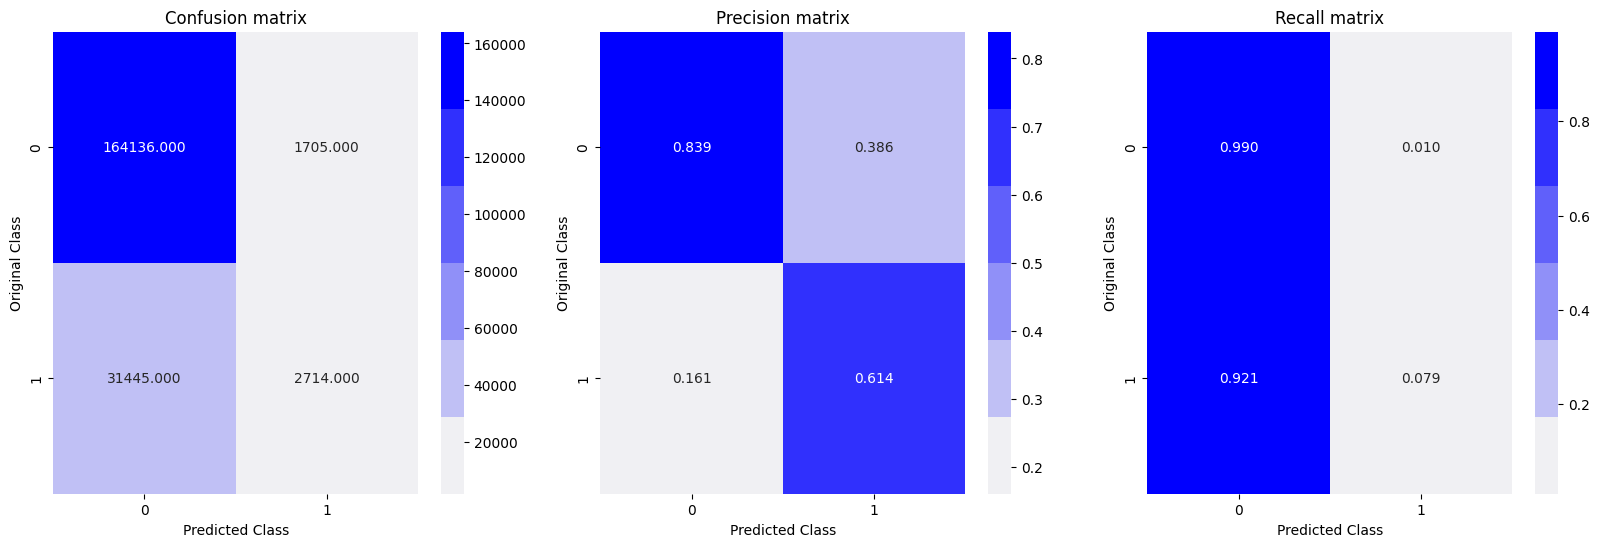

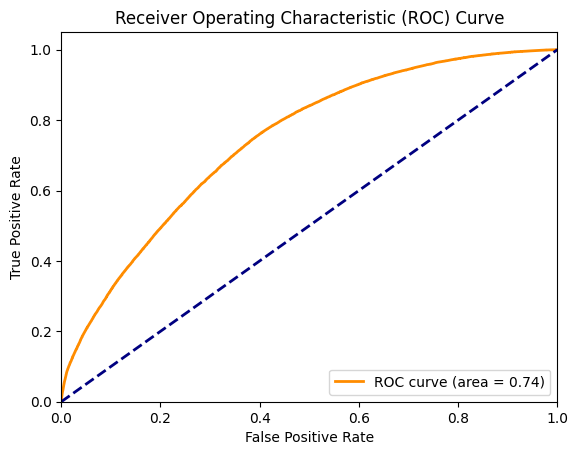

In [43]:
predicted_y = np.argmax(y_test_pred, axis=1)
performance_graphs(y_test, predicted_y, Best_XGB.predict_proba(X_test_pCTR)[:,1])

# Conclusion

Here's a brief summary of the steps I performed in this project:

1) Importing 1 million data points from Prof. Bianchi's server

2) Performed a general EDA, then an EDA of context-based features, then an EDA of user-based features, followed by an EDA of anonymized categorical variables, and finally an EDA of time/hour.

3) I engineered 7 new features overall and ended up using 4 of them in my prediction model training:
    - hour
    - day
    - device_id_counts
    - device_ip_counts
    - hourly_user_counts
    - daily_user_counts
    - hourly_adview_counts

Here's a list of features I used for training: site_id','site_domain','site_category','app_id','app_category',

'app_domain', 'device_model','device_type','device_conn_type','device_id_counts','device_ip_counts', 'banner_pos','C1',

'C14','C15','C16','C17','C18','C19','C20','C21','hourly_user_count','daily_user_count'.


4) I then prepared the data for training and modelling. Since we had categorical data, I realised that we should use encoding such as target/response encoding. This was better than one-hot encoding based on our features. One-hot encoding would lead to a high-dimensional and sparse feature space, because some categorical variables have many unique categories.

5) After response encoding, I moved on to train test splitting of data and trying out the following models with their respective log losses for comparison:
    - Stochastic Gradient Descent (SGD) Classifier Model (with hyperparameter tuning) with log loss of 0.4088071354244422
    - Logistic Regression Model (with hyperparameter tuning) with log loss of 0.4089094571852754
    - Random Forest Model (no tuning since it was very computationaly expensive) with log loss of 0.6089727313340287
    - SVM Model (with hyperparameter tuning): Kernel
    - XGBoost Model (with hyperparameter tuning) with log loss of 0.40084684431525913

Here's a brief summary of the performance measures of the different models I tried for prediction:

        - ROC Curve (AUROC)
        - Precise Matrix
        - Recall Matrix
        - Confusion Matrix

At the end, considering all trade-offs, XGBoost Classifier had the least log-loss of 0.401 with a AUC of ROC curve of 0.74. It's the best prediction model I've designed in this project and I have decided to use it to generate my submissions file for the Kaggle challenge.

# BONUS: Kaggle Submission File Generation

##### Reading the data

In [25]:
test_df = pd.read_csv('data/test.gz', compression='gzip')

A little EDA

In [26]:
test_df.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,1.000055e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,1.000109e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,1.000138e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [27]:
test_df.shape

(4577464, 23)

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577464 entries, 0 to 4577463
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   hour              int64  
 2   C1                int64  
 3   banner_pos        int64  
 4   site_id           object 
 5   site_domain       object 
 6   site_category     object 
 7   app_id            object 
 8   app_domain        object 
 9   app_category      object 
 10  device_id         object 
 11  device_ip         object 
 12  device_model      object 
 13  device_type       int64  
 14  device_conn_type  int64  
 15  C14               int64  
 16  C15               int64  
 17  C16               int64  
 18  C17               int64  
 19  C18               int64  
 20  C19               int64  
 21  C20               int64  
 22  C21               int64  
dtypes: float64(1), int64(13), object(9)
memory usage: 803.2+ MB


In [29]:
test_df.isnull().sum()

id                  0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

##### All looks good. I will now add the new engineered features

day and hour

In [30]:
test_df['day'] = test_df['hour'].apply(lambda x:datesplit(x).weekday())
test_df['hour'] = test_df['hour'].apply(lambda x:datesplit(x).hour)

device id counts

In [31]:
device_id_counts = test_df['device_id'].value_counts()

test_df['device_id_counts'] = test_df['device_id'].map(device_id_counts)

device ip counts

In [32]:
device_ip_counts = test_df['device_ip'].value_counts()

test_df['device_ip_counts'] = test_df['device_ip'].map(device_ip_counts)

hourly user counts

In [33]:
df_hourr=test_df[['hour','device_ip']].groupby(['hour']).count()

In [34]:
from tqdm import tqdm
user_count=[]
for index in tqdm(test_df['hour']):
    user_count.append(df_hourr['device_ip'][index])

100%|██████████| 4577464/4577464 [00:12<00:00, 362680.40it/s]


In [35]:
test_df['hourly_user_count']=user_count

daily user counts

In [36]:
df_dayy=test_df[['day','device_ip']].groupby(['day']).count()

In [37]:
from tqdm import tqdm
user_count=[]
for index in tqdm(test_df['day']):
    user_count.append(df_dayy['device_ip'][index])

100%|██████████| 4577464/4577464 [00:12<00:00, 369568.35it/s]


In [38]:
test_df['daily_user_count']=user_count

##### Let's prepare our training and testing datasets now.

In [45]:
# features I chose for my prediction models
feature_chosen=['site_id','site_domain','site_category','app_id','app_category','app_domain',
                'device_model','device_type','device_conn_type','device_id_counts','device_ip_counts',
                'banner_pos','C1','C14','C15','C16','C17','C18','C19','C20','C21','hourly_user_count','daily_user_count']


X_train_pCTR = pd.DataFrame()
X_test_pCTR = pd.DataFrame()

for name in tqdm(feature_chosen):
    
    vocab,mean=target_fit(X_train,name) 
    
    X_train_pCTR[name] = target_encode_transform(X_train[name],vocab,mean)
    X_test_pCTR[name] = target_encode_transform(test_df[name],vocab,mean)

100%|██████████| 23/23 [00:24<00:00,  1.08s/it]


In [46]:
X_train_pCTR.shape

(800000, 23)

In [47]:
X_test_pCTR.shape

(4577464, 23)

##### Training and Prediction

Using the XGBoost trained model from my project.

In [49]:
y_test_pred=Best_XGB.predict_proba(X_test_pCTR)

In [65]:
y_test_pred.shape

(4577464, 2)

In [103]:
dd = pd.read_csv('data/test.gz', dtype={'id': str})

In [105]:
output = pd.DataFrame({
"id": dd['id'],
"click": y_test_pred[:, 1]
})

output.to_csv('my_submission.csv', index=False)

My private score is 0.44036 and my public score is 0.44276